# **Let's check out the dataset first**

In [2]:
data = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
data

**Checking how many valid values are there**

In [3]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.602548
Critic_Score,51.330821
Critic_Count,51.330821
Rating,40.486871
User_Score,40.098092
Developer,39.613613
Year_of_Release,1.608948
Publisher,0.322986
Name,0.011962
Genre,0.011962


 # **Basic EDA**

Corr heatmap for all the data 

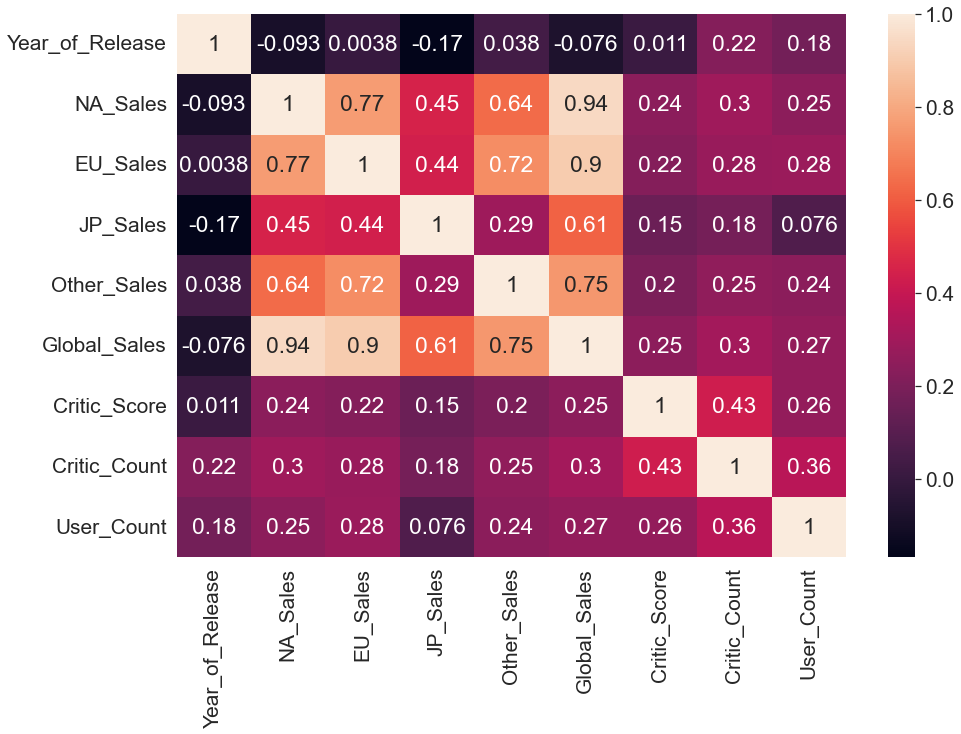

In [4]:
plt.figure(figsize=(15, 10))
data_corr = data.corr()
sb.heatmap(data_corr, 
            xticklabels = data_corr.columns.values,
            yticklabels = data_corr.columns.values,
            annot = True);

Generally, Sales have weak correlations with all the numerical variables other than dependent variables(region sales). Hence let's explore some of the catergorical variables first.

Let's start by looking at the top 5 games in each region:

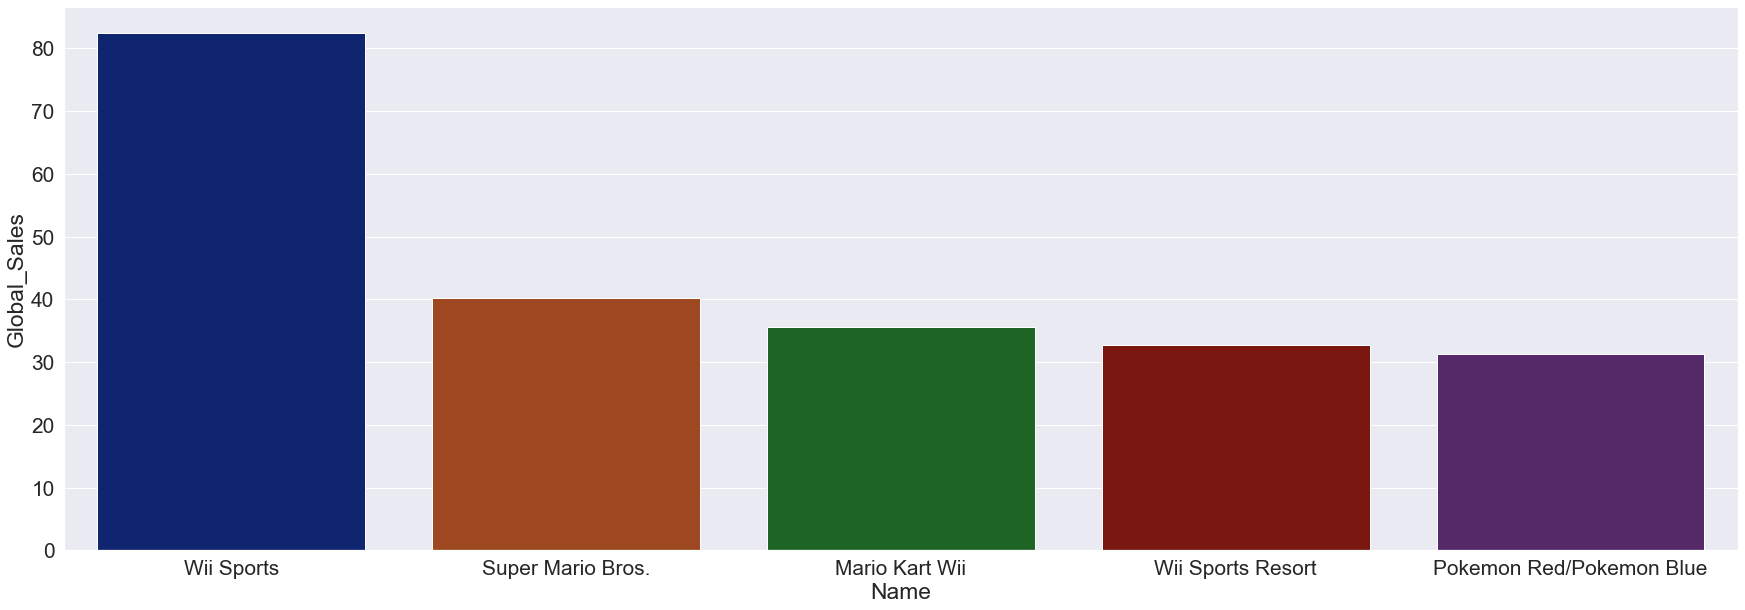

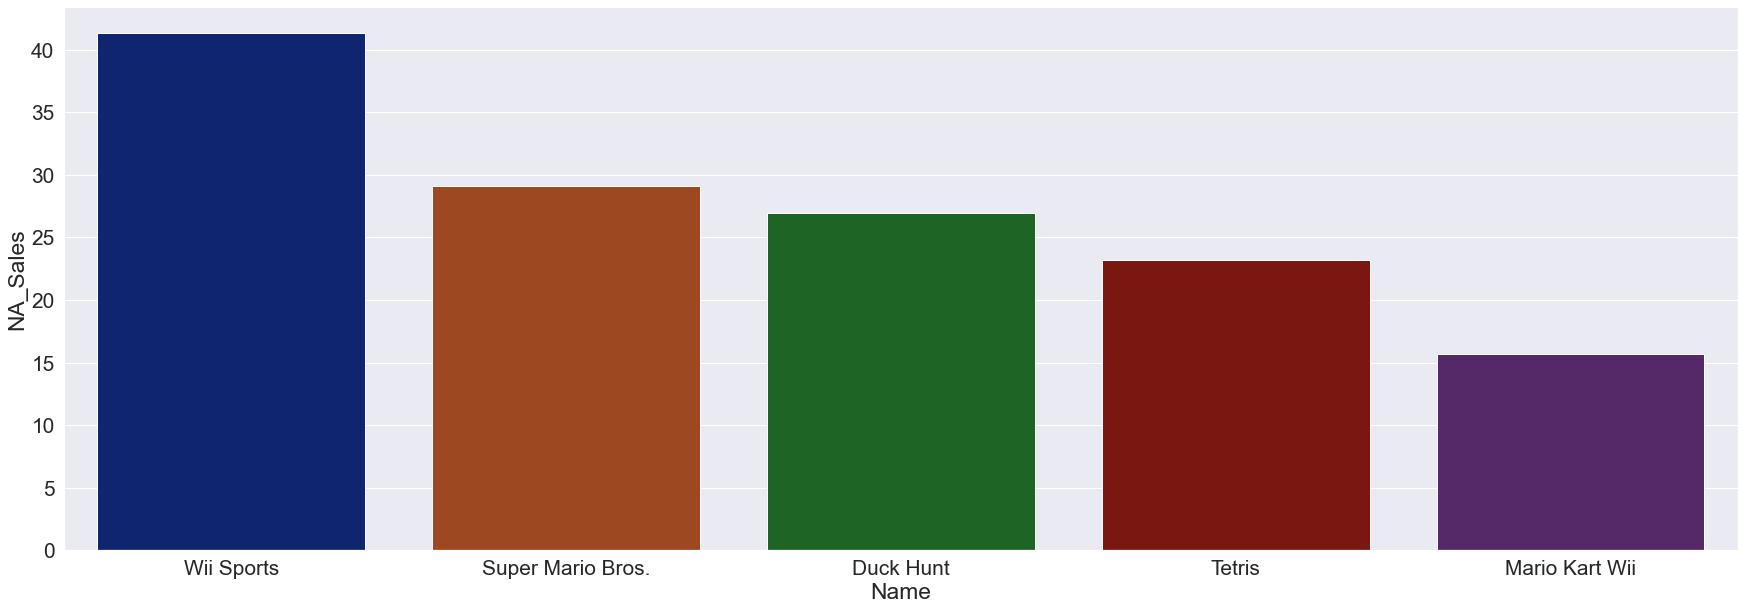

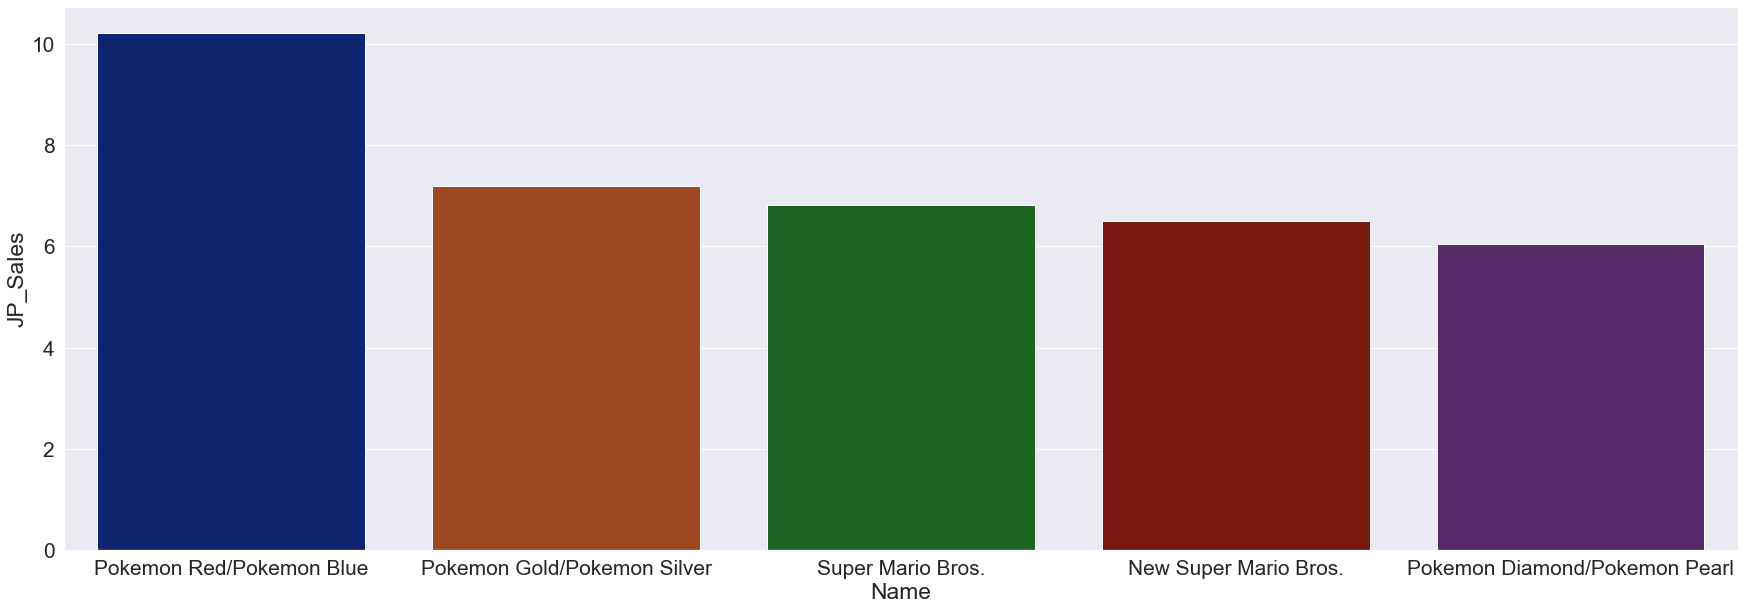

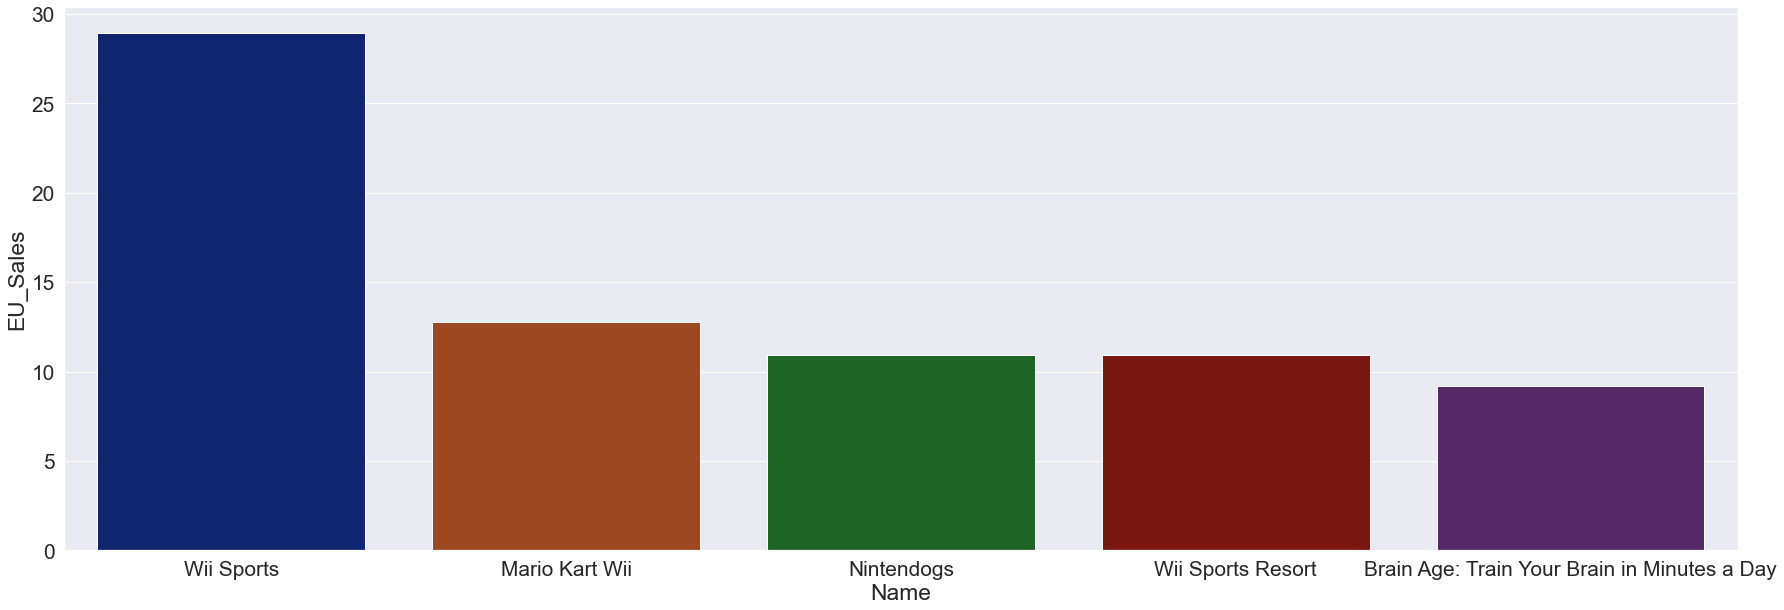

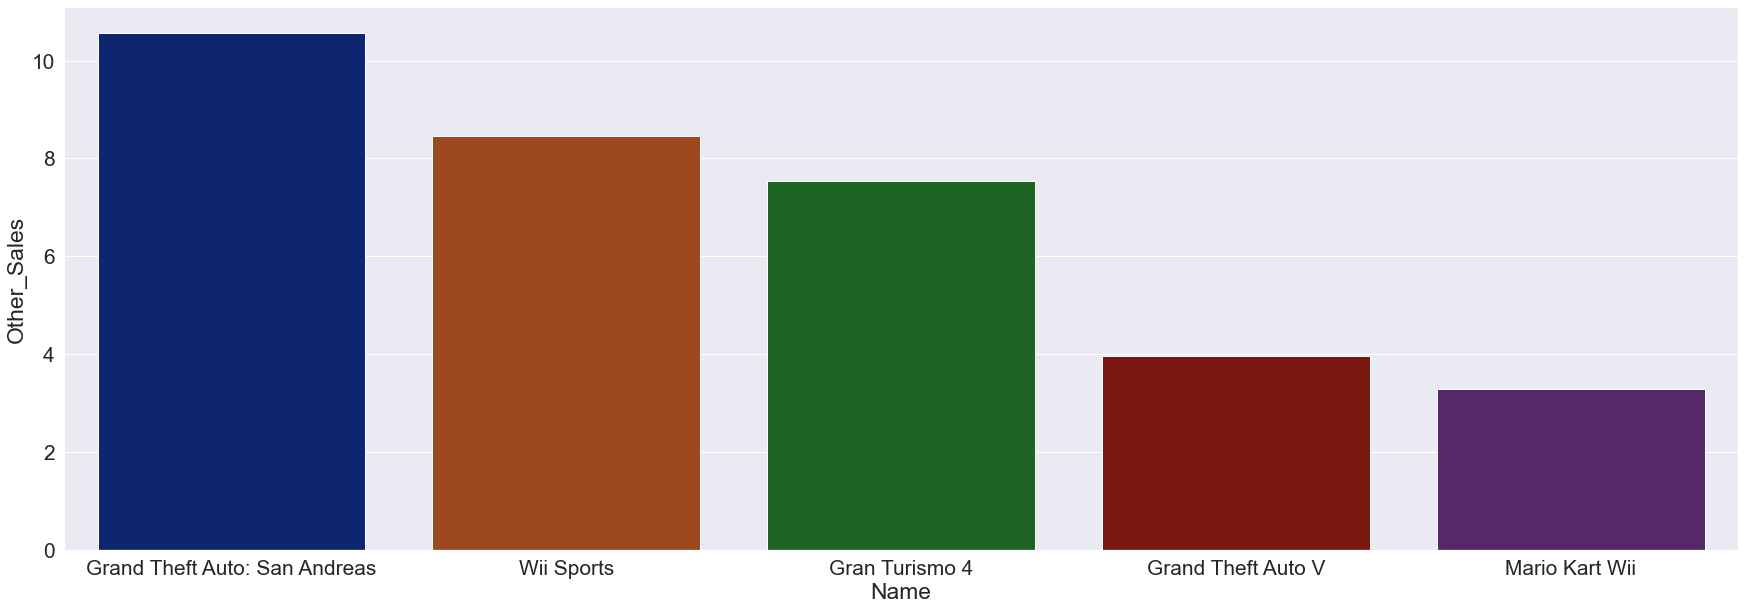

In [5]:
top5_gamesByRegion(data, "Global_Sales")
top5_gamesByRegion(data, "NA_Sales")
top5_gamesByRegion(data, "JP_Sales")
top5_gamesByRegion(data, "EU_Sales")
top5_gamesByRegion(data, "Other_Sales")

Interestly, Every region has different top 5s. Every region has a slight difference in taste. NA sales also make up a huge proportion of the Global Sales and followed by EU sales.

# **1. Genre**

**Data Cleaning before EDA**

In [6]:
cleanedData = null_cleaning(data, ['Genre', 'Publisher'])
cleanedGenre = cleanedData['Genre'] 


Plotting the graphs to see some relationships

Text(0.5, 1.0, 'Global Video Game Sales')

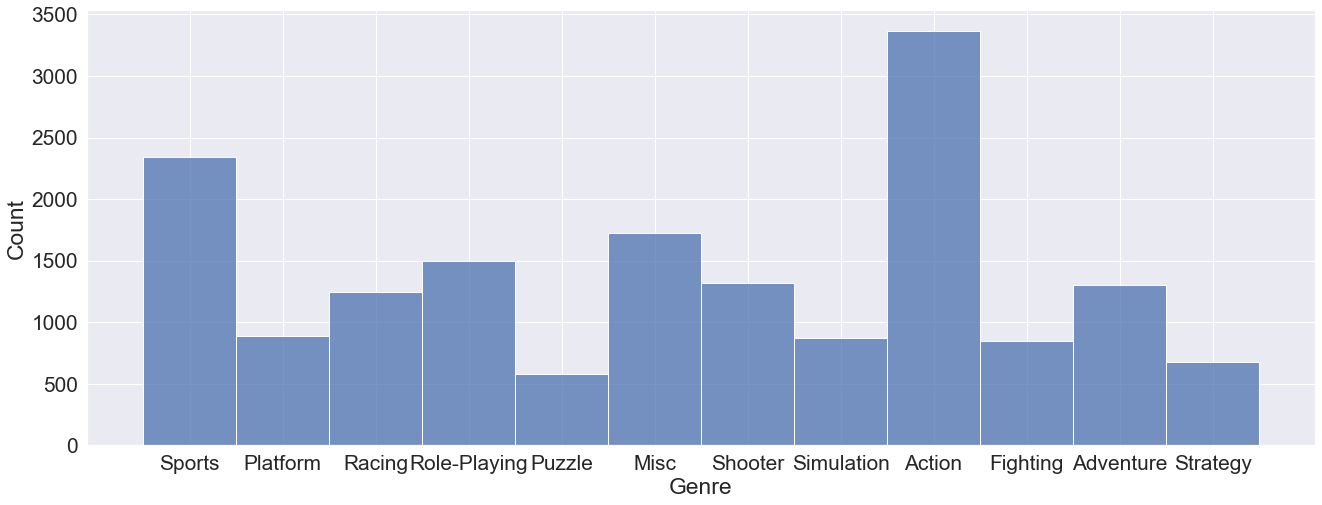

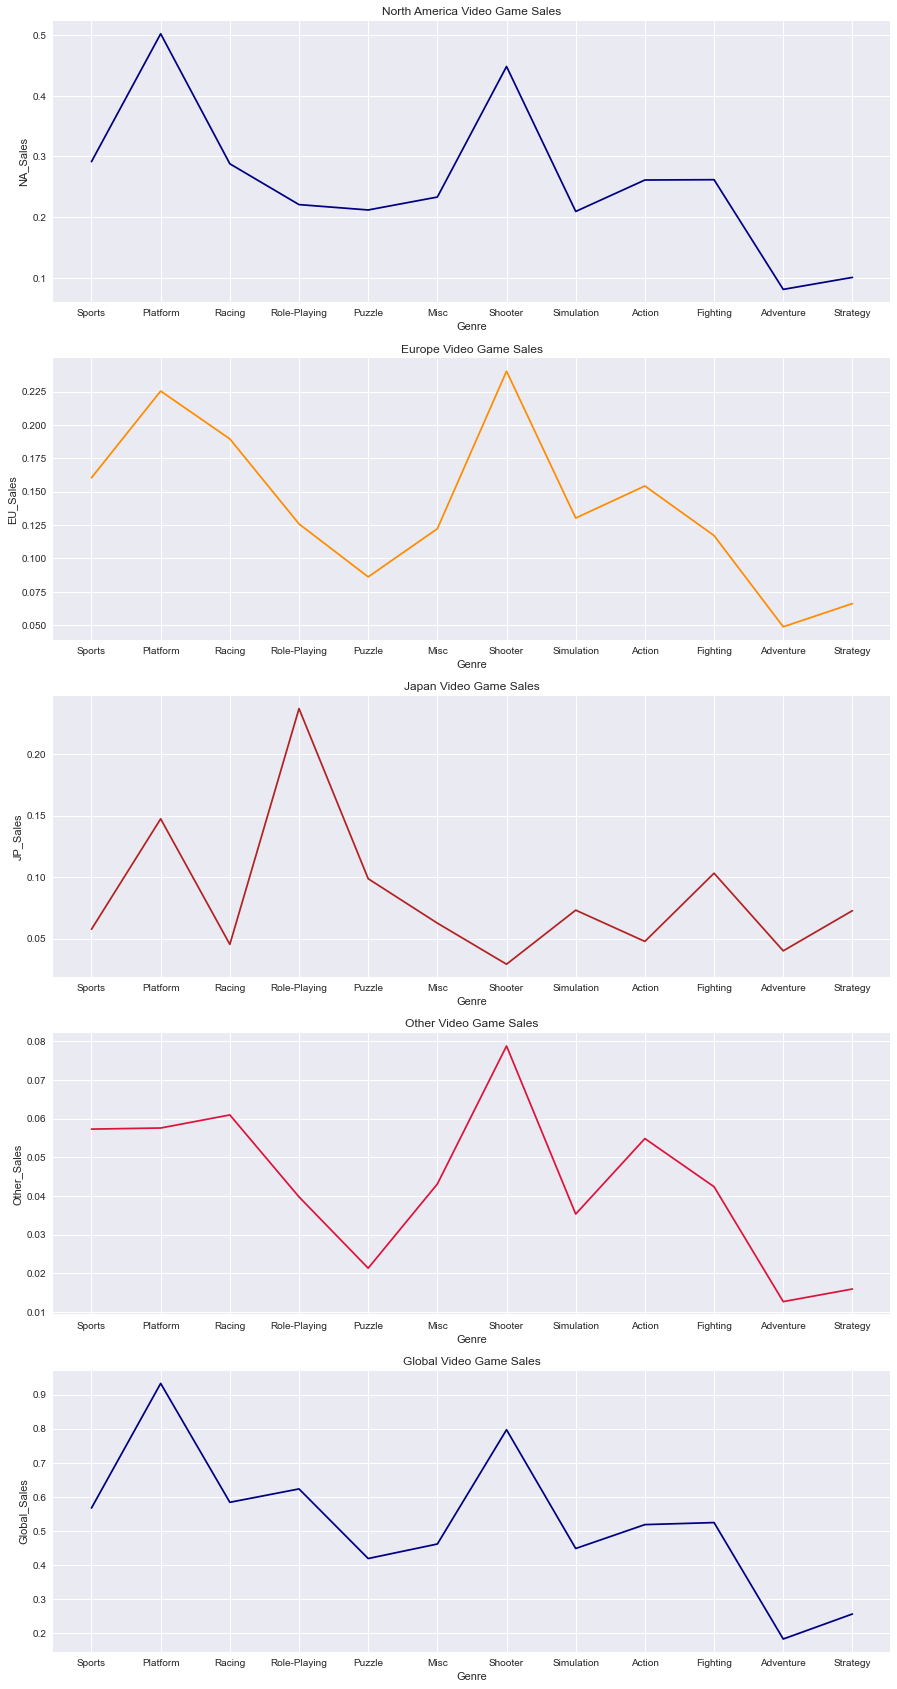

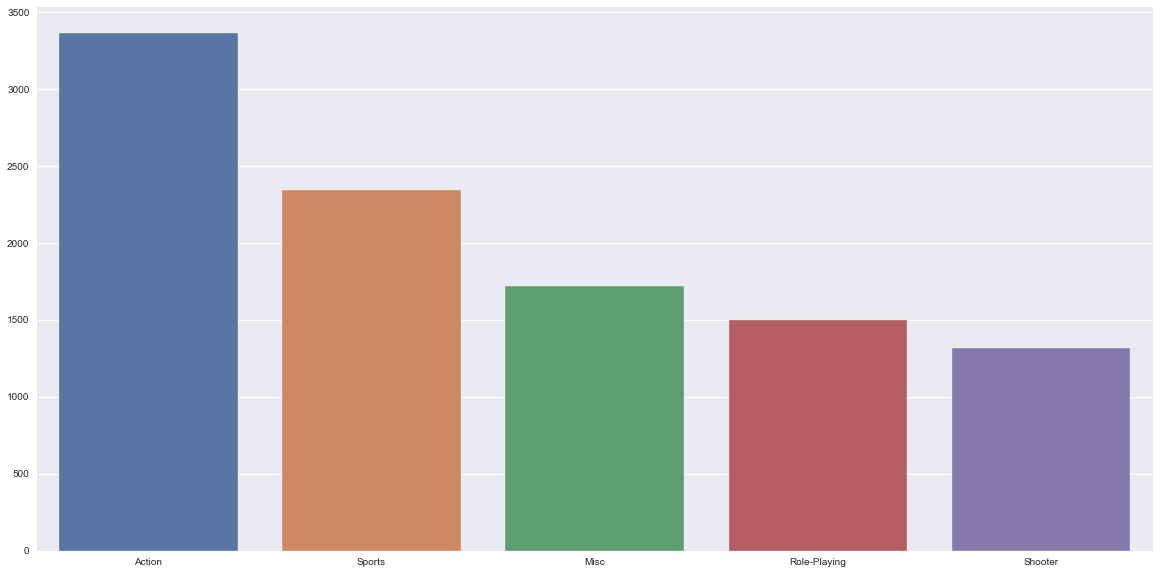

In [7]:
fig, ax = plt.subplots(1,1, figsize=(22,8))
sb.histplot(data = cleanedGenre)

plt.style.use("seaborn")
fig, ax =plt.subplots(5,1, figsize=(15,30)) 

top_5 = Counter(cleanedData['Genre'].tolist()).most_common(5)
top_x, top_y = [x[0] for x in top_5], [x[1] for x in top_5]
f = plt.figure(figsize= (20,10))
sb.barplot(x=top_x,y=top_y, palette="deep")

sb.lineplot(data=cleanedData, x = 'Genre', y = "NA_Sales", ci=None, ax=ax[0], color="navy")
ax[0].set_title("North America Video Game Sales")

sb.lineplot(data=cleanedData, x = 'Genre', y = "EU_Sales", ci=None, ax=ax[1], color="darkorange")
ax[1].set_title("Europe Video Game Sales")

sb.lineplot(data=cleanedData, x = 'Genre', y = "JP_Sales", ci=None, ax=ax[2], color="firebrick")
ax[2].set_title("Japan Video Game Sales")

sb.lineplot(data=cleanedData, x = 'Genre', y = "Other_Sales", ci=None, ax=ax[3], color="crimson")
ax[3].set_title("Other Video Game Sales")

sb.lineplot(data=cleanedData, x = 'Genre', y = "Global_Sales", ci=None, ax=ax[4], color="navy")
ax[4].set_title("Global Video Game Sales")


The Bar graph shows us the total number of games released under each genre. With action taking the lead.
From the line graphs we can identify the top genre in each region easily by the sales in that region:

1. Top North American Genre: Platform
2. Top Europe Genre: Shooter
3. Top Japan Genre: Role-Playing 
4. Top Global Genre: platform
5. Top Genre for Other Region: Shooter

(9640, 16)
(10001, 16)
(9818, 16)
(10001, 16)
(9416, 16)


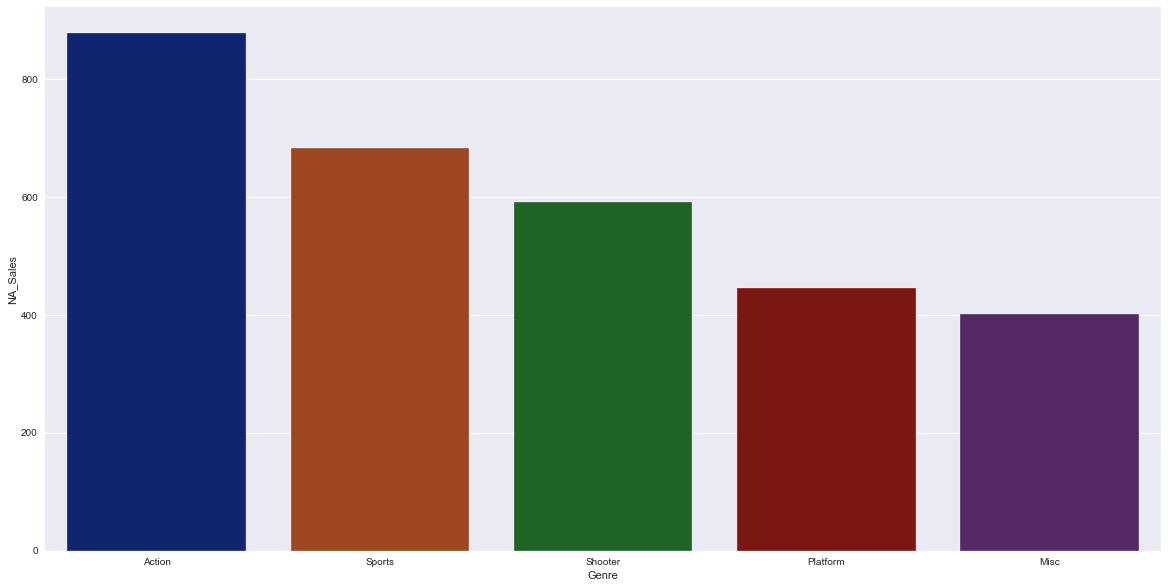

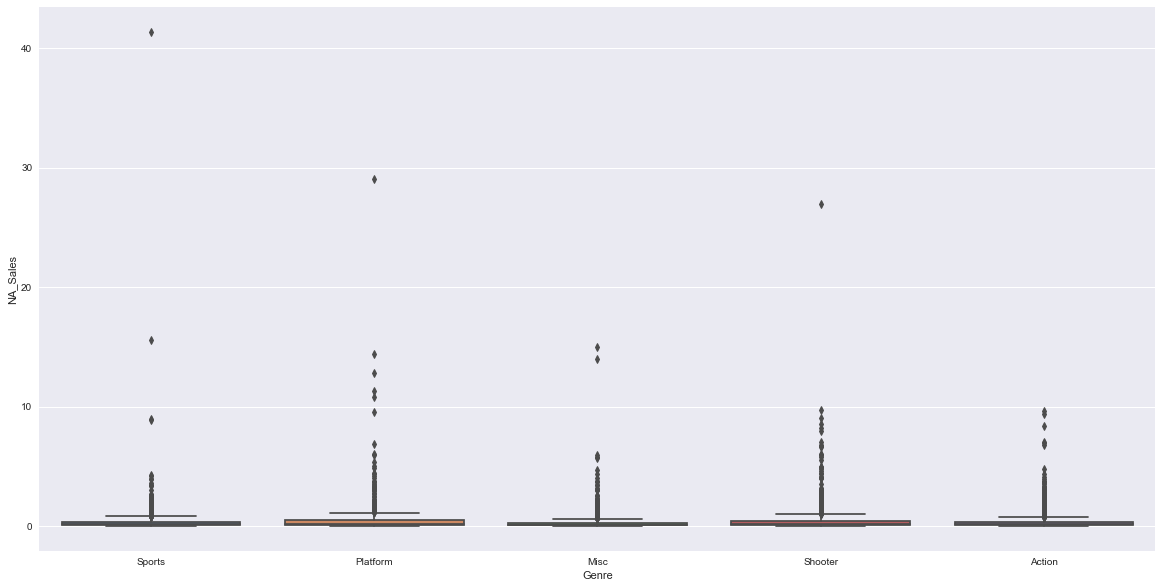

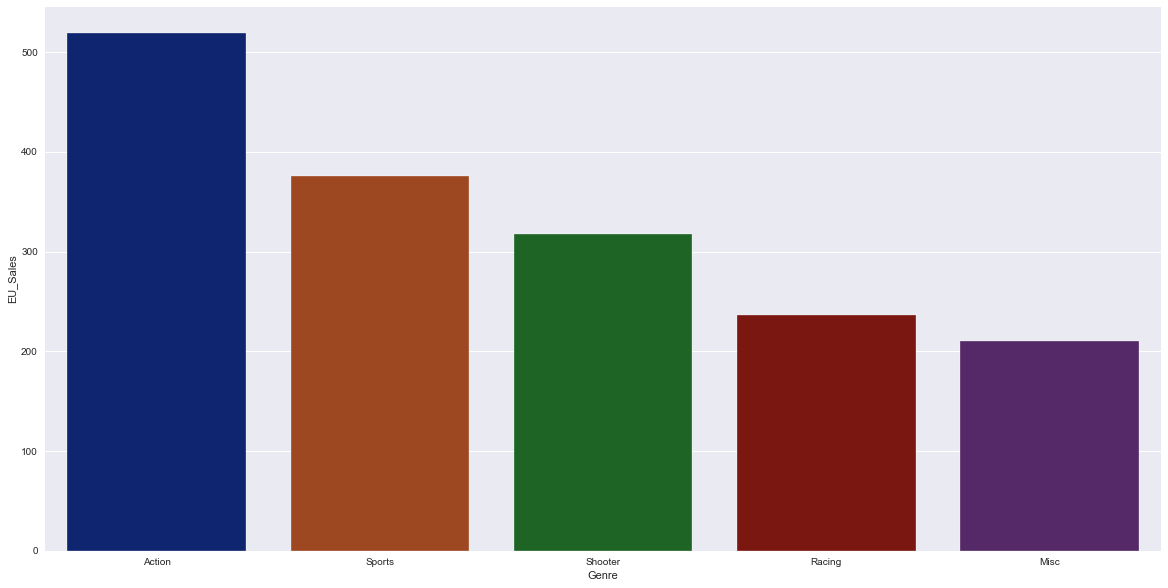

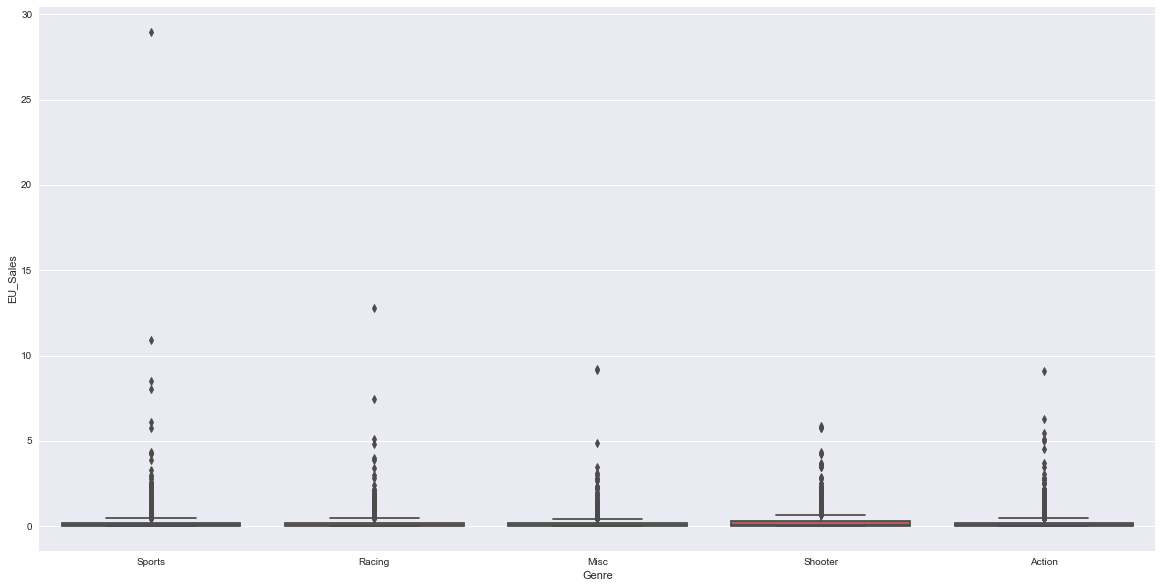

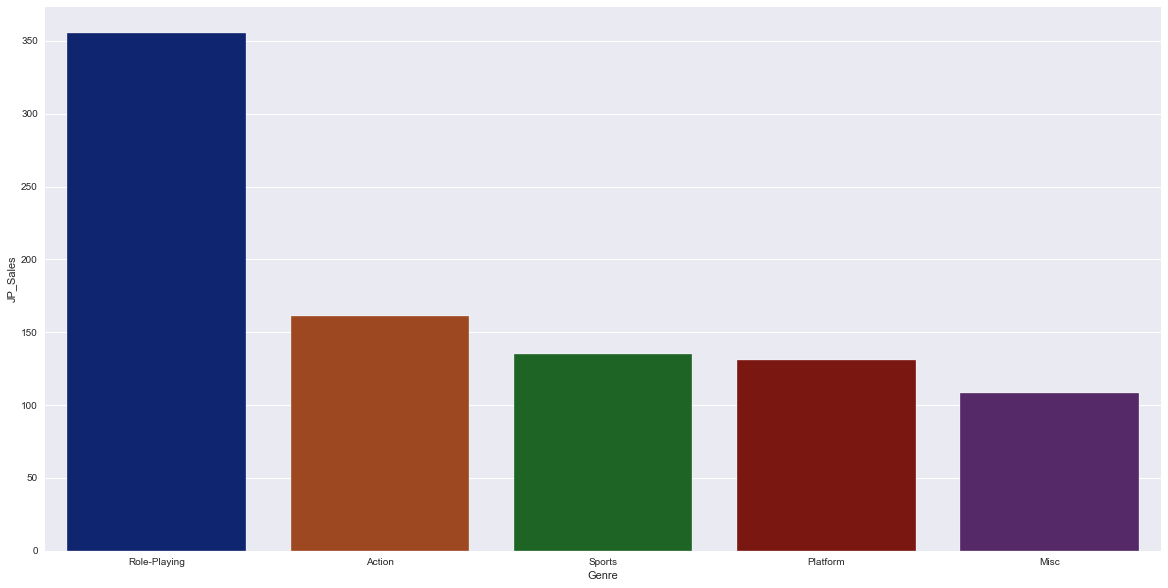

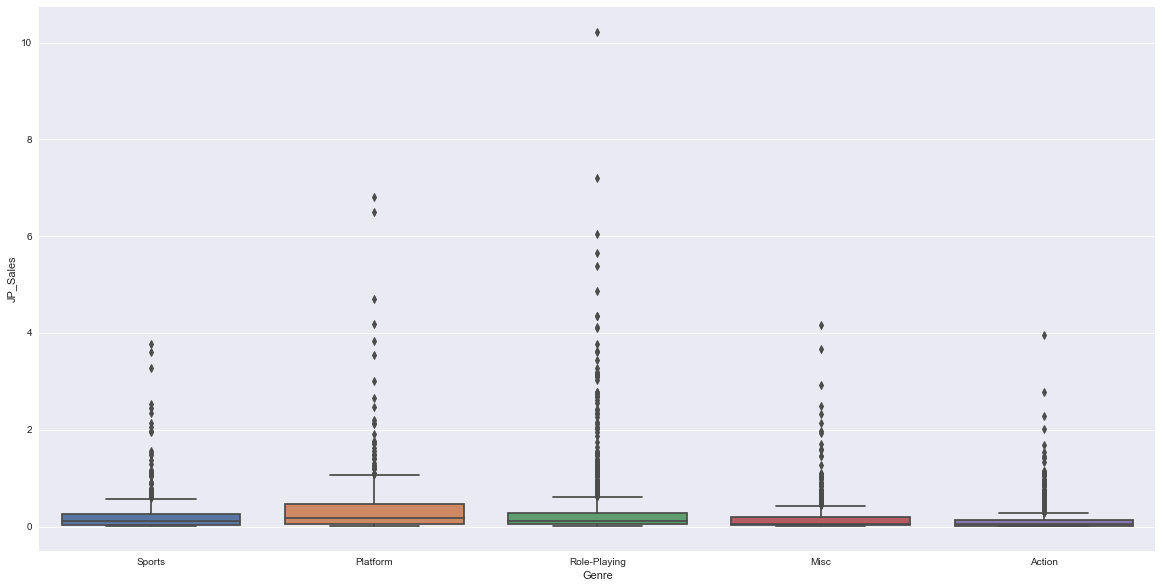

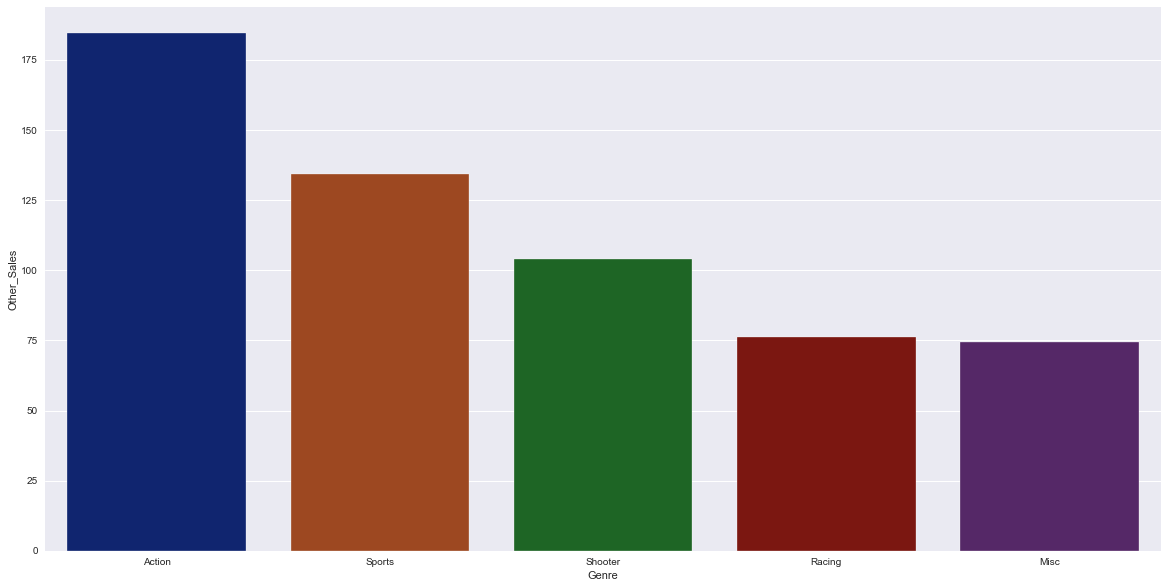

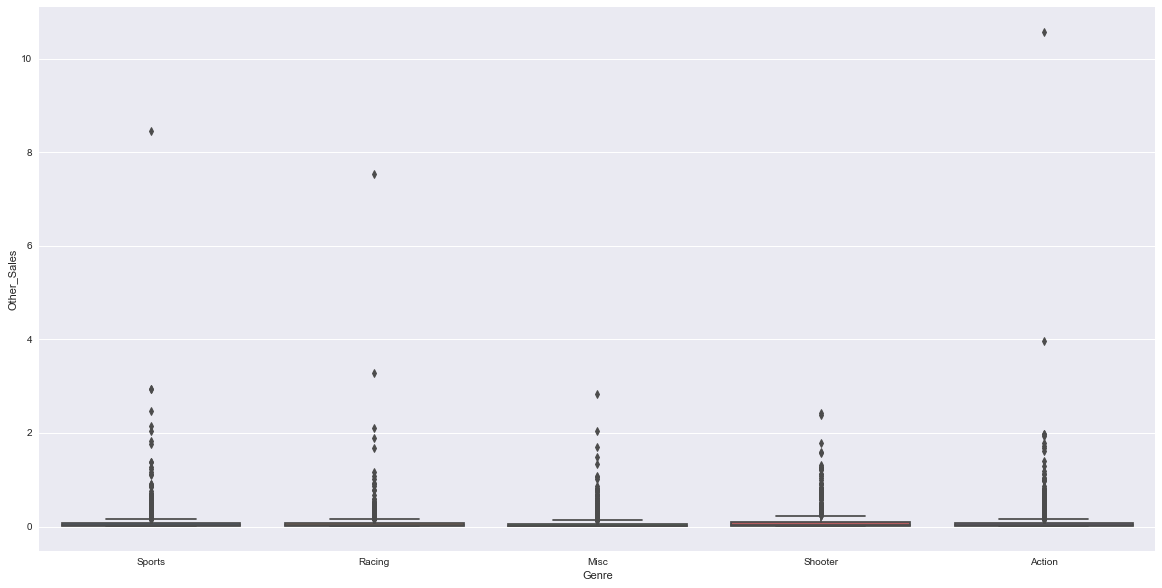

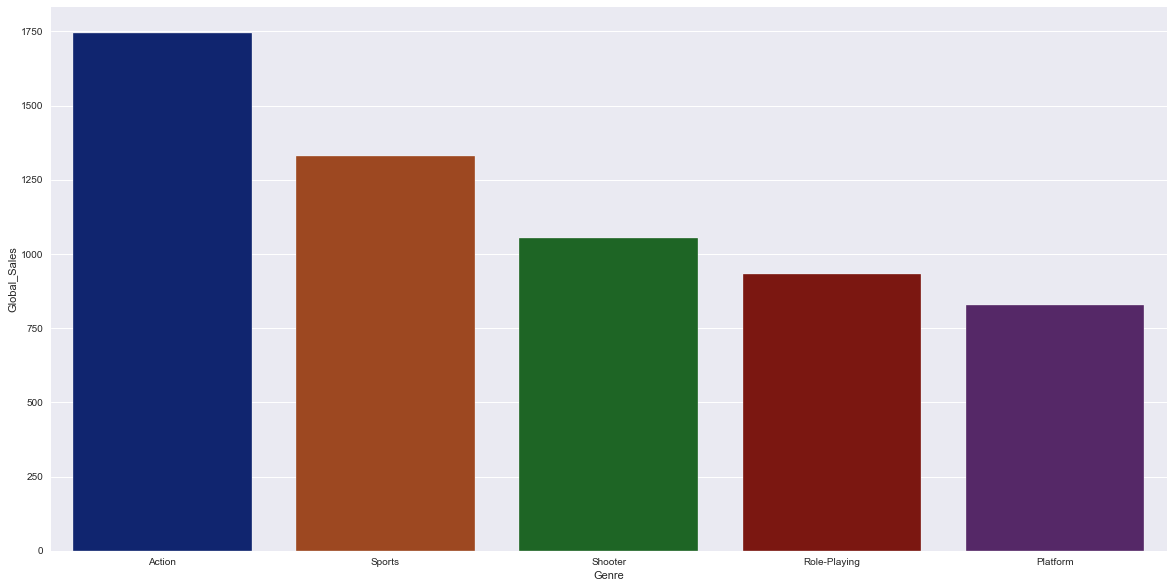

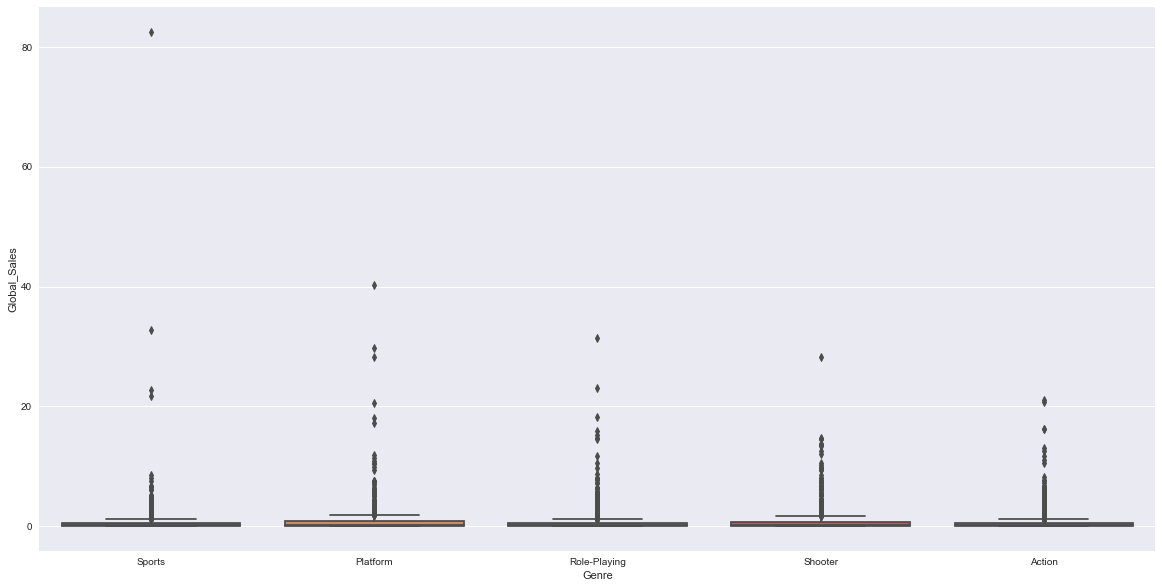

In [8]:
#from each region pick the top 5
top5_genreByRegion(cleanedData,"NA_Sales")

top5_genreByRegion(cleanedData,"EU_Sales")

top5_genreByRegion(cleanedData,"JP_Sales")

top5_genreByRegion(cleanedData,"Other_Sales")

top5_genreByRegion(cleanedData,"Global_Sales")

Numerical bar graph for top 5 genre in each region by the number of release. Interestingly, for most regions, action games has the highest number of releases but still did not top in sales. We can also observe a lot of outliers.

# **2. Platform**

Data cleaning before EDA.

In [9]:
cleanedData = null_cleaning(data, ['Platform'])



Lets see the games released by the different platforms

<AxesSubplot:title={'center':'Global_Sales'}, ylabel='Platform'>

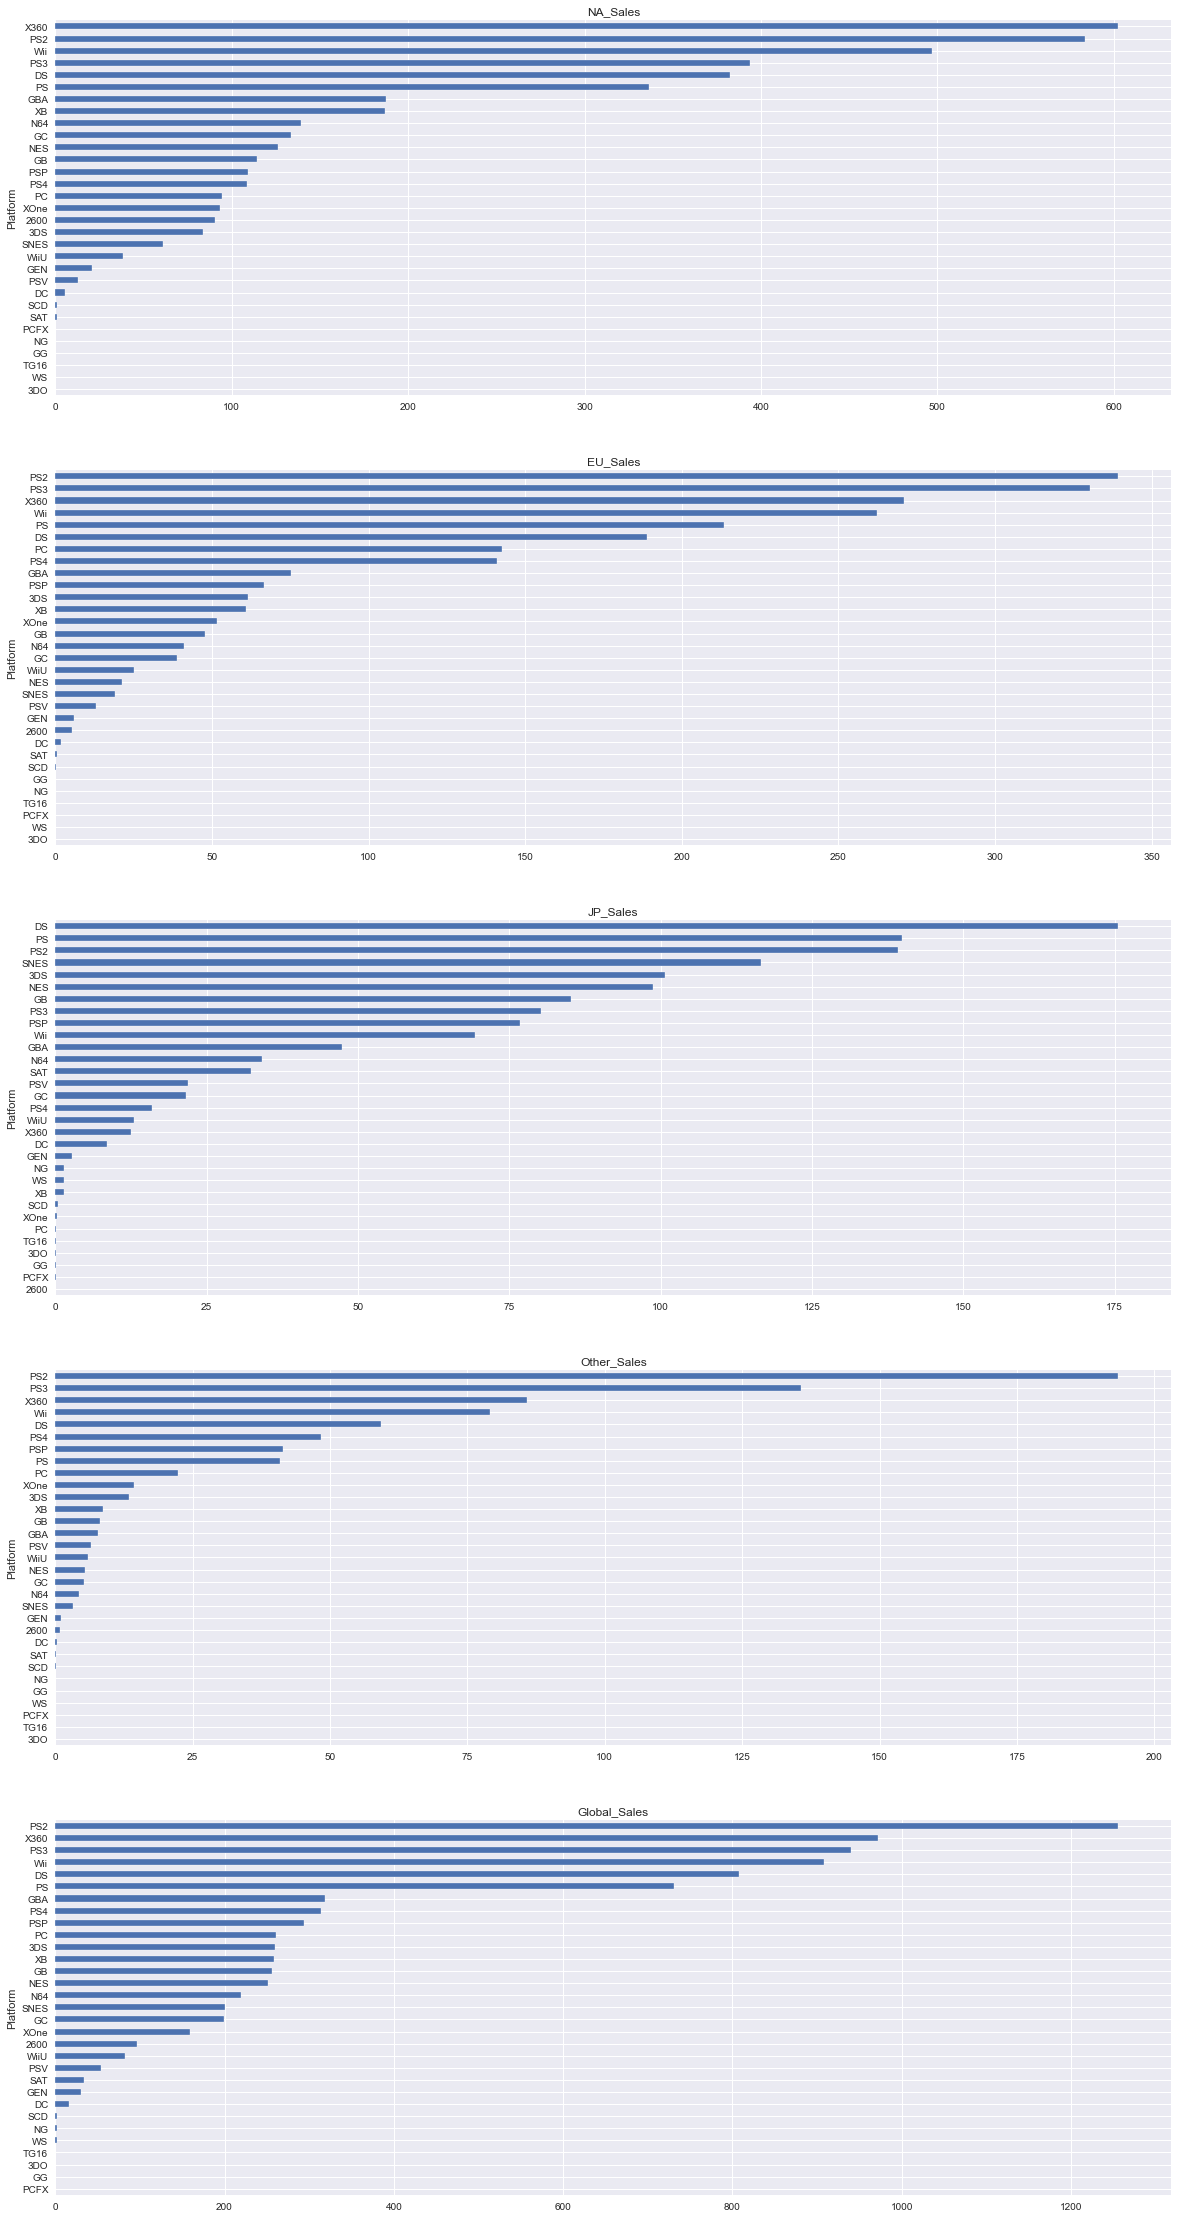

In [10]:
f, axes = plt.subplots(5, 1, figsize=(20, 40))
cleanedData.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='NA_Sales', ax = axes[0])
cleanedData.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='EU_Sales', ax = axes[1])
cleanedData.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='JP_Sales', ax = axes[2])
cleanedData.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='Other_Sales', ax = axes[3])
cleanedData.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='Global_Sales', ax = axes[4])

Generally, PS2 and X360 games have the greatest number of sales in each region with the exception of the Japan region(DS). Maybe in Japan, handhelds are more popuplar?


# **3. Publisher**

Cleaning data

In [11]:
#checking invalid data rows
print(data["Publisher"].isnull().sum());
print(data[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].isnull().sum())
#simple cleaning
cleaned_data = null_cleaning(data, ["Publisher"])
print(cleaned_data["Publisher"].value_counts())

54
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64


Finding the top 10 publishers

<AxesSubplot:>

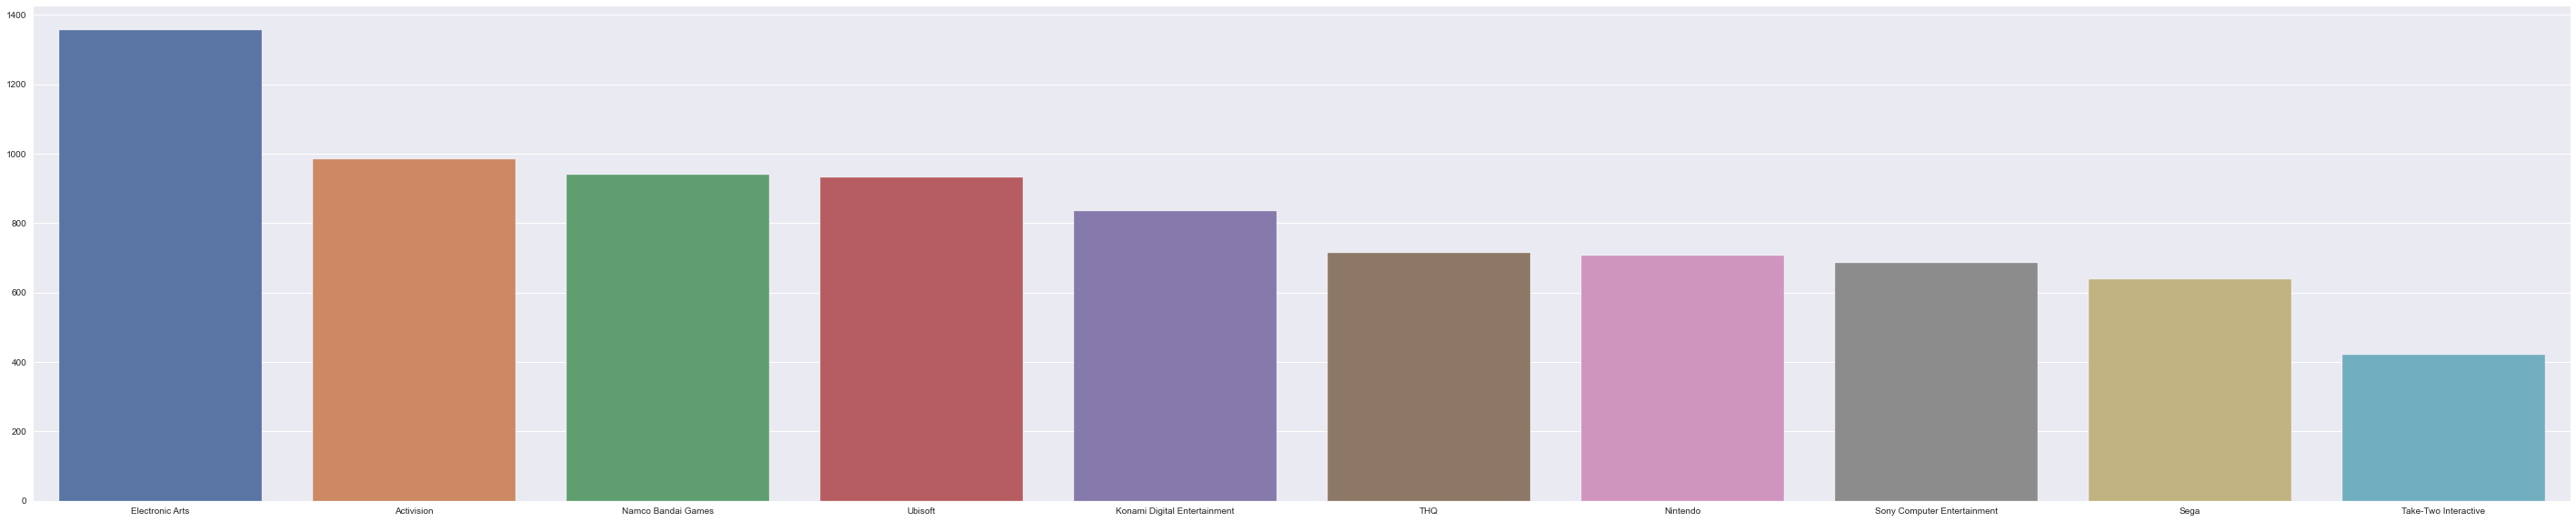

In [12]:
#top 10 publishers with the most number of games
top_10 = Counter(cleaned_data['Publisher'].tolist()).most_common(10)
top_x, top_y = [x[0] for x in top_10], [x[1] for x in top_10]
f = plt.figure(figsize= (50,10))
sb.barplot(x=top_x,y=top_y, palette="deep")

Obviously the AAA publishers have the highest number of games released. Let's now take a look at publishers with the most sales in each region. 

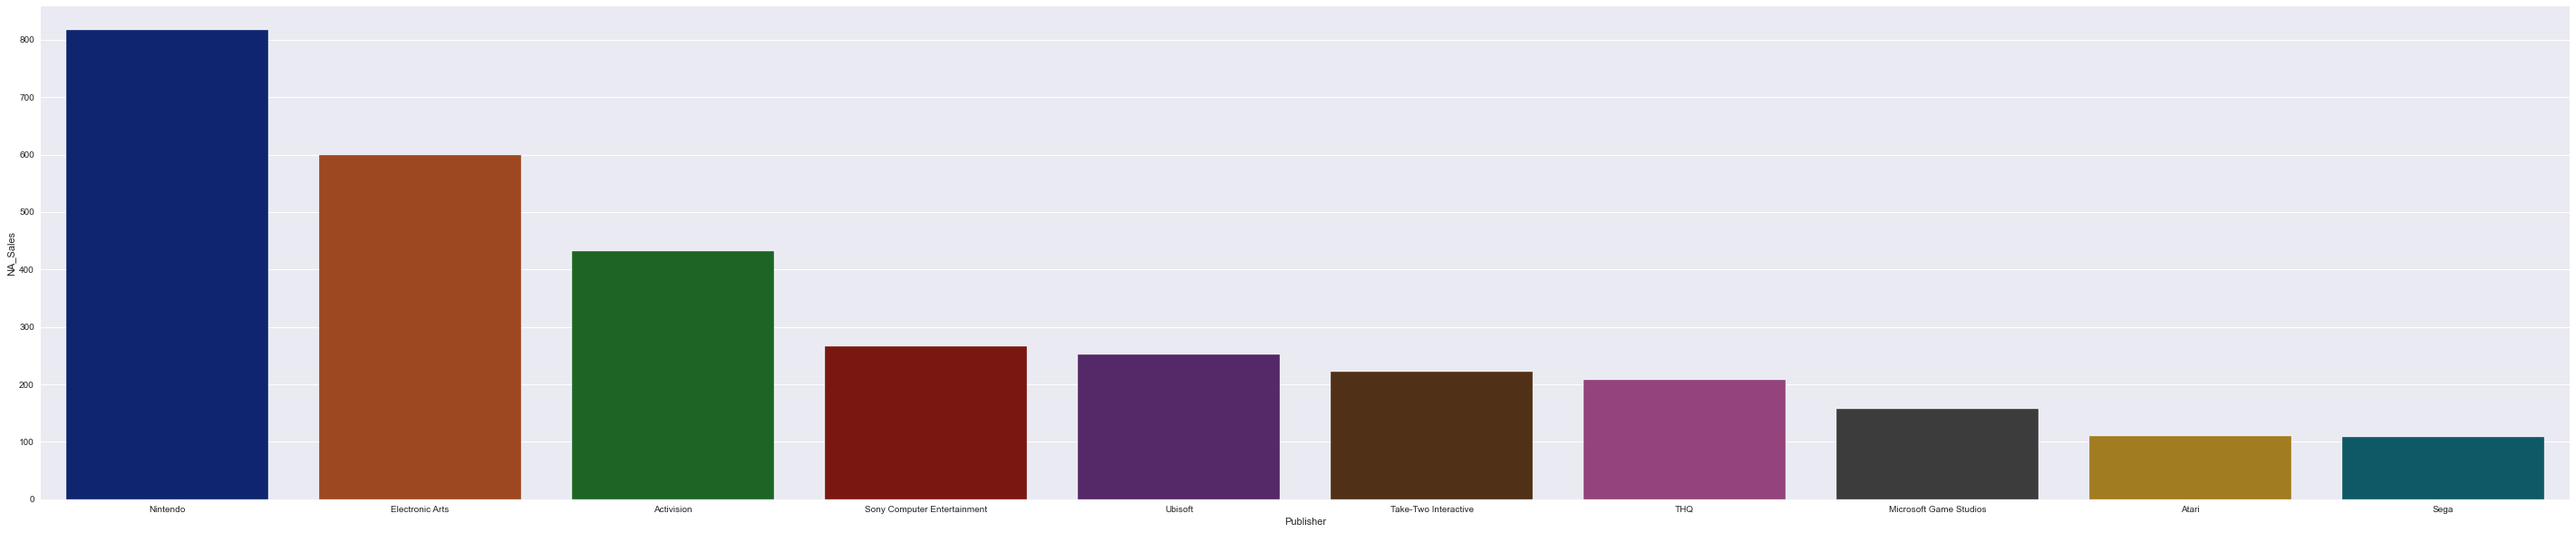

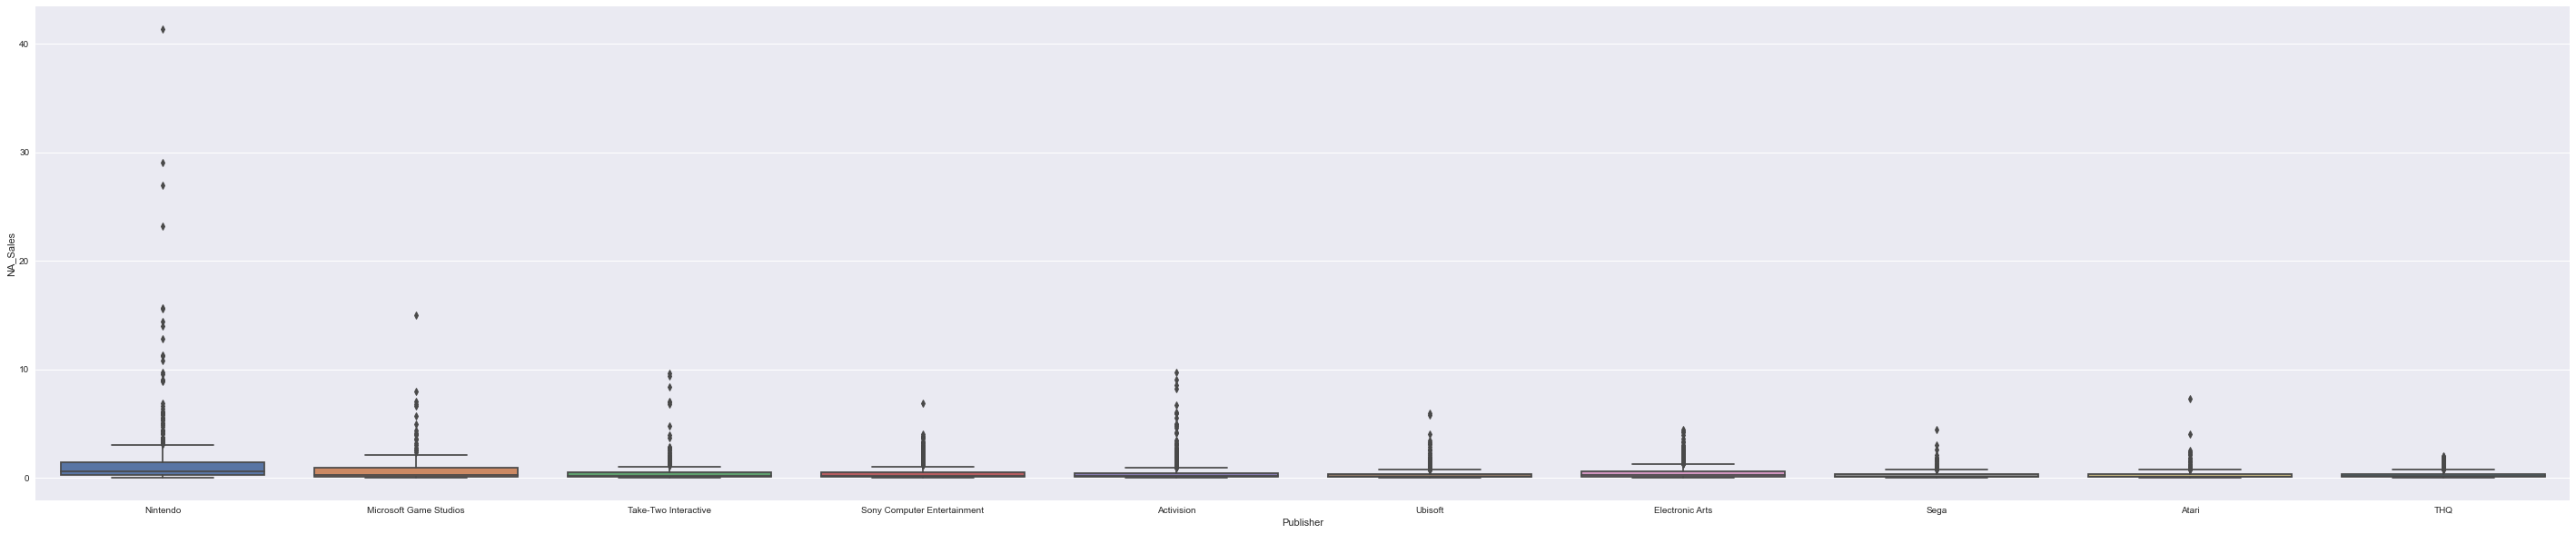

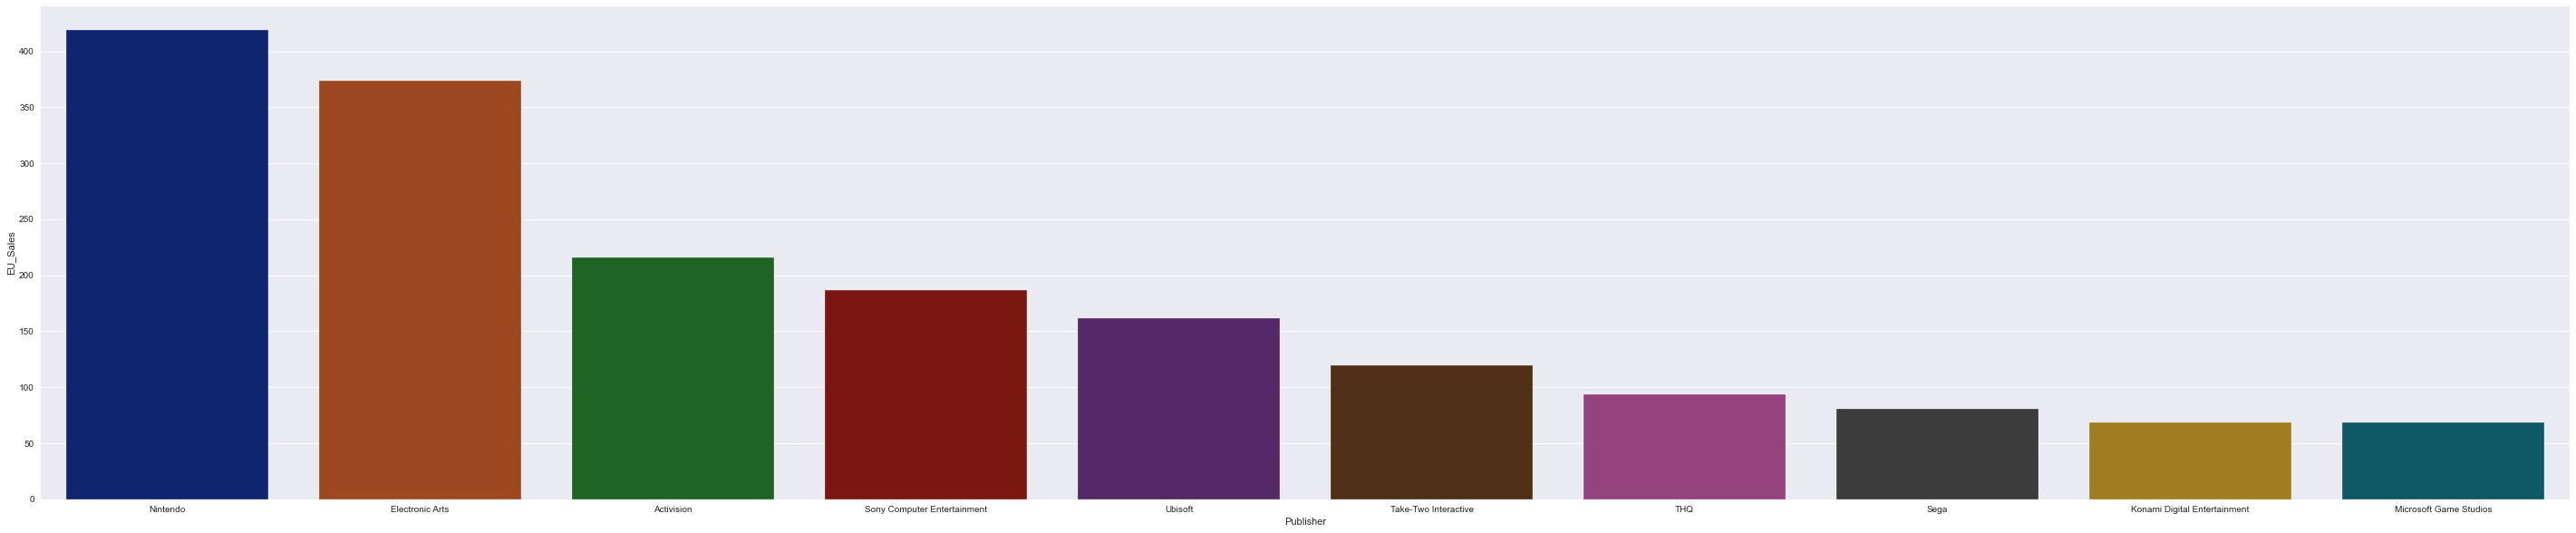

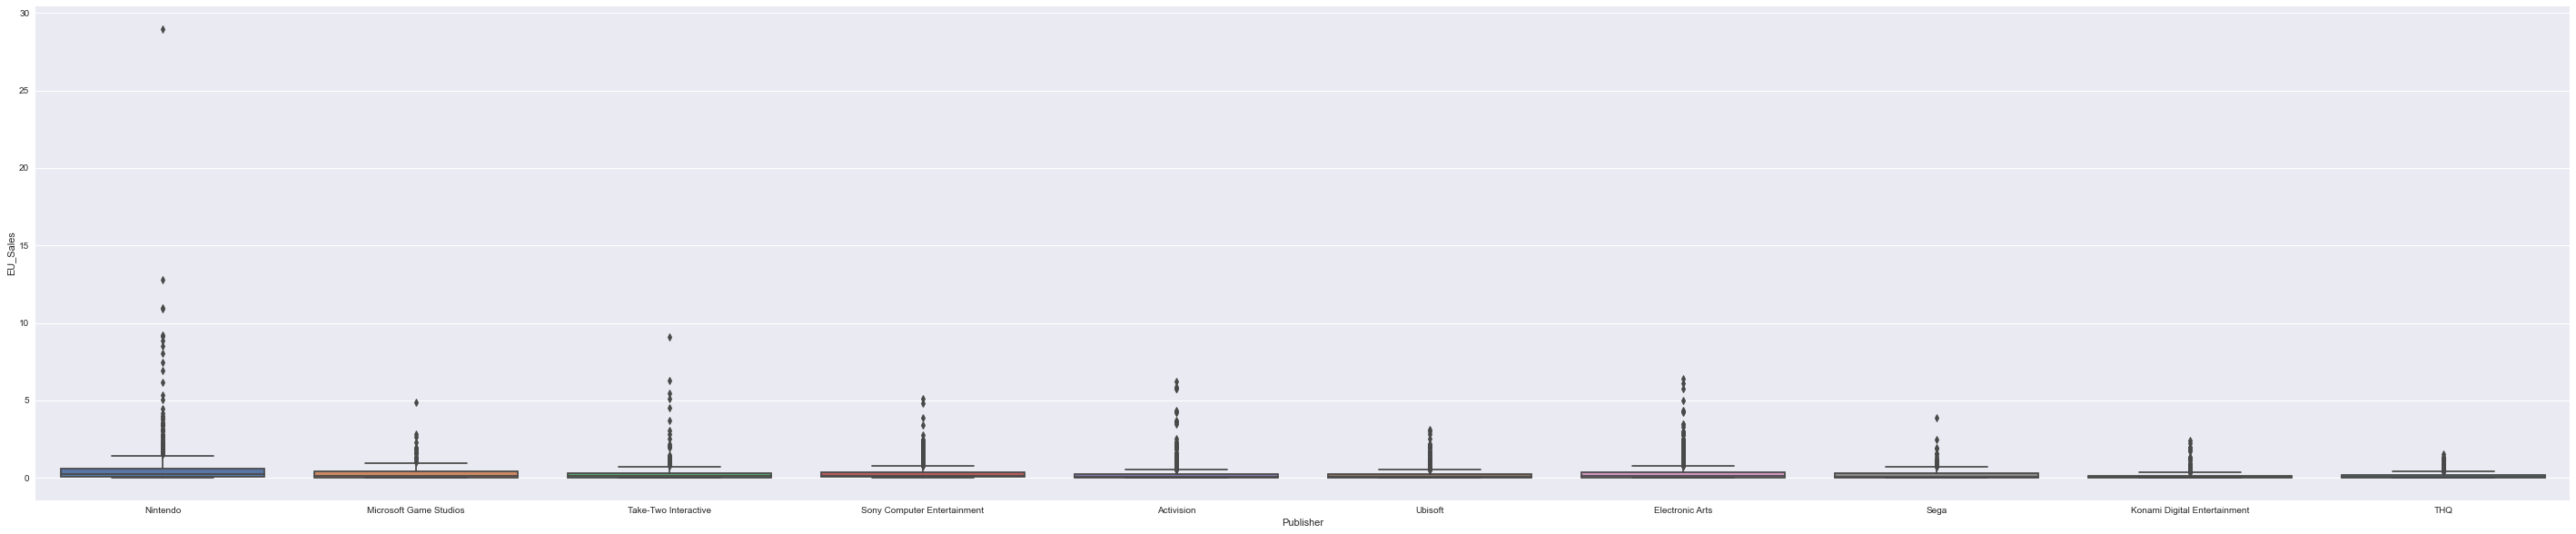

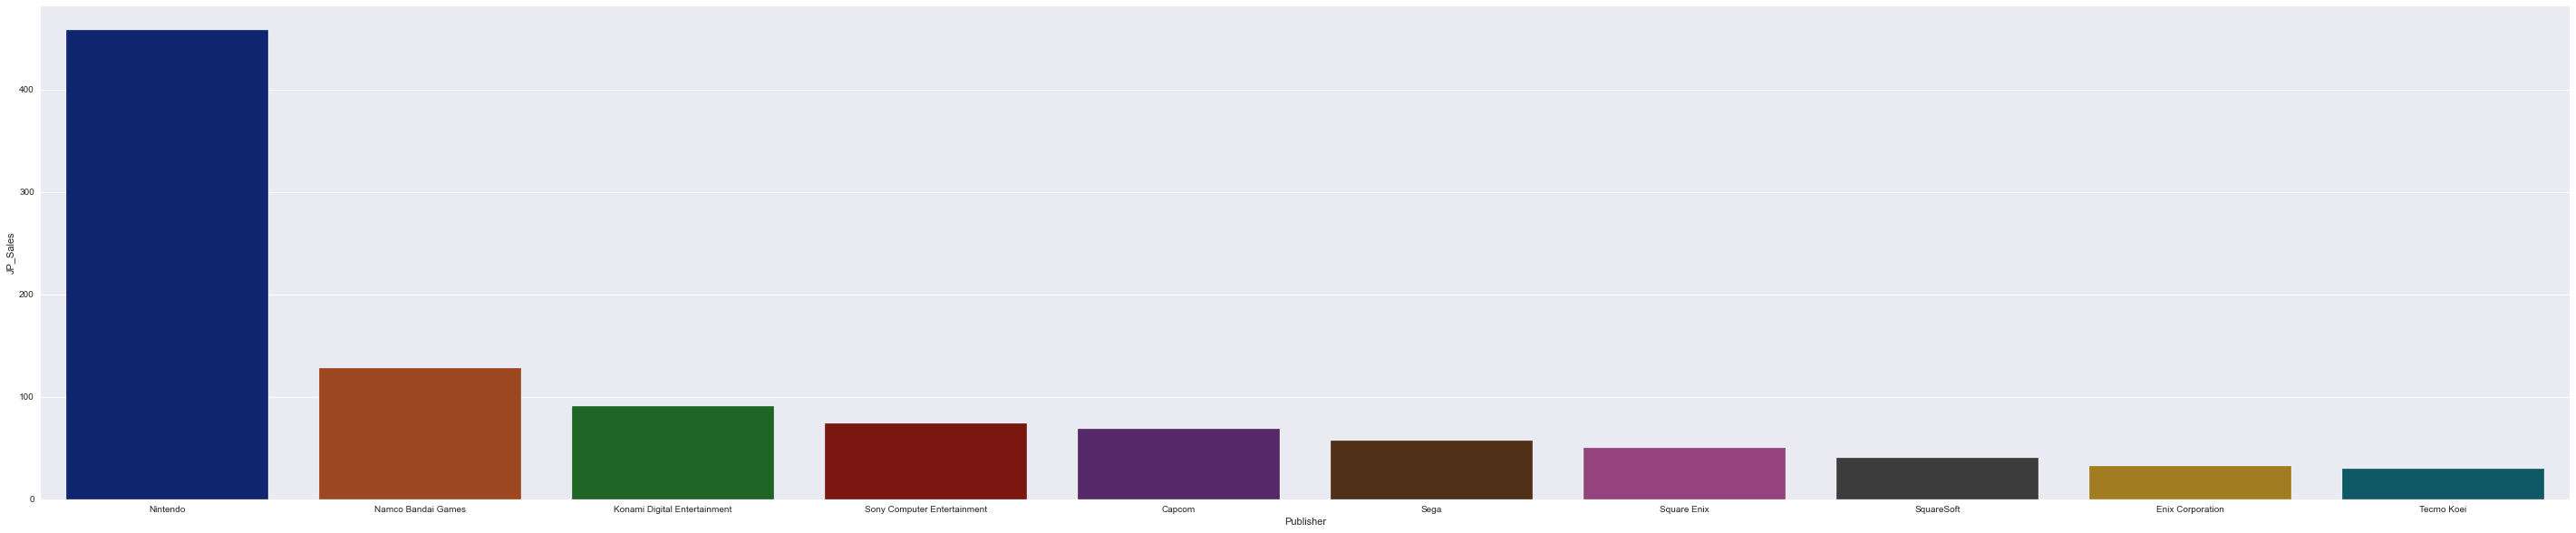

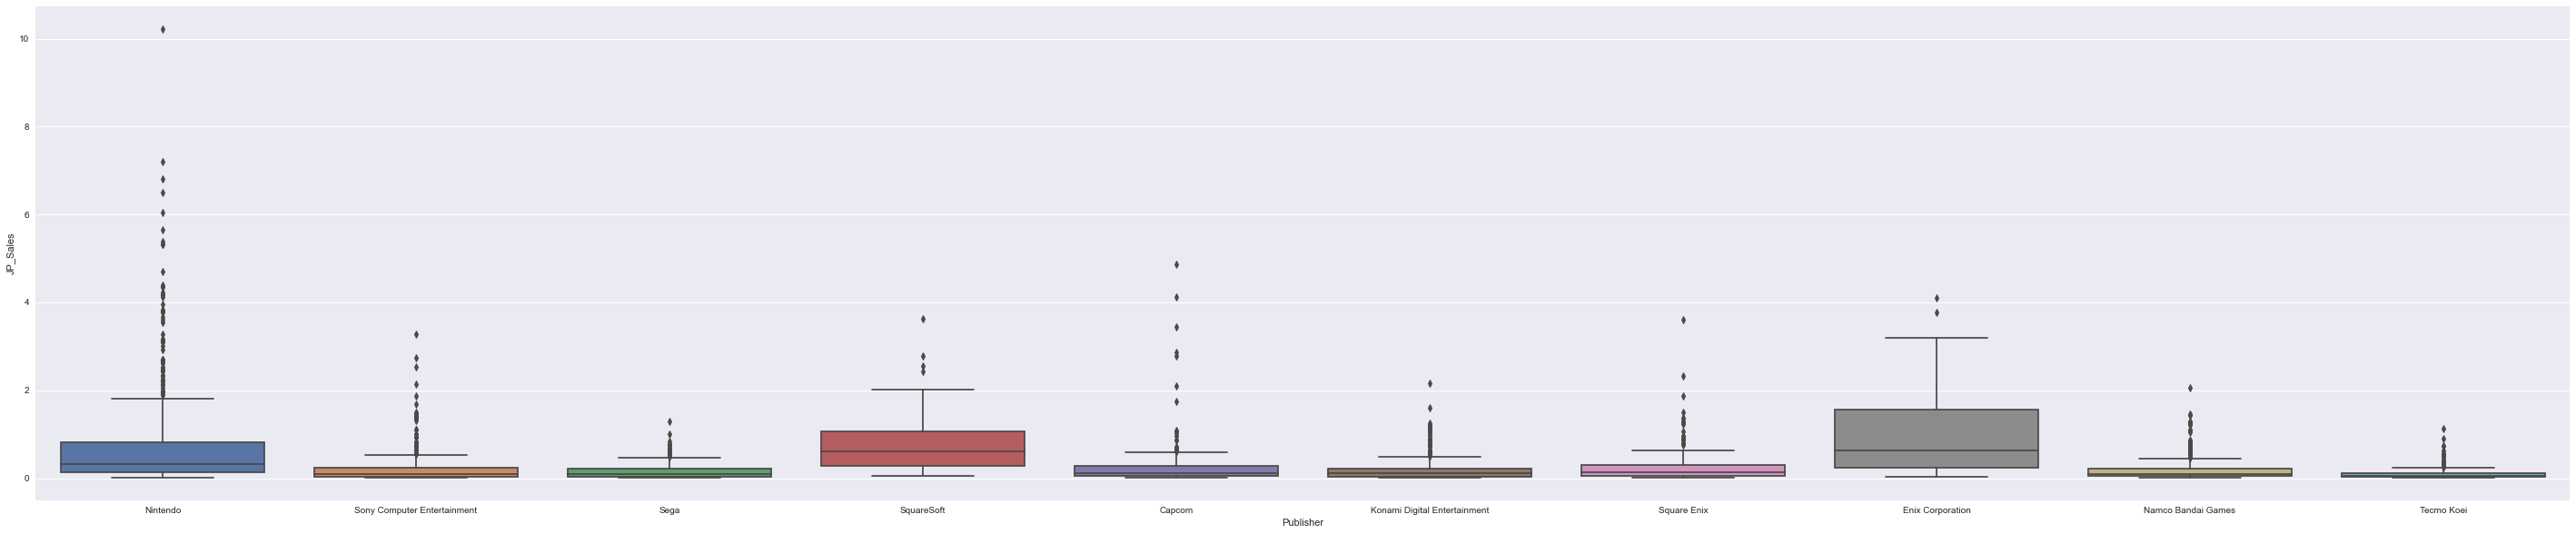

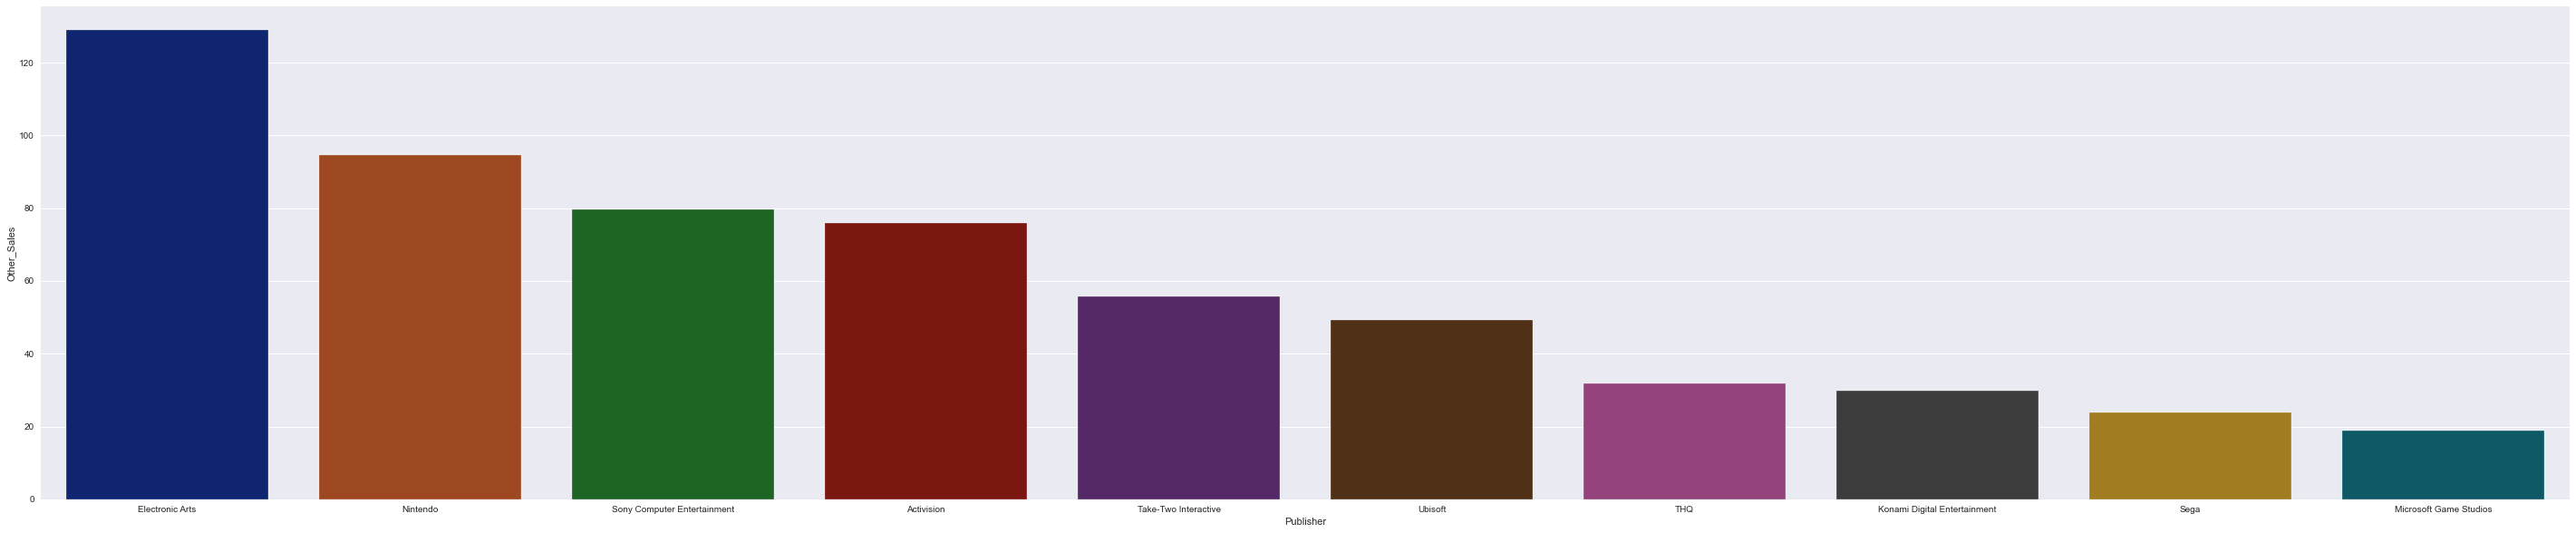

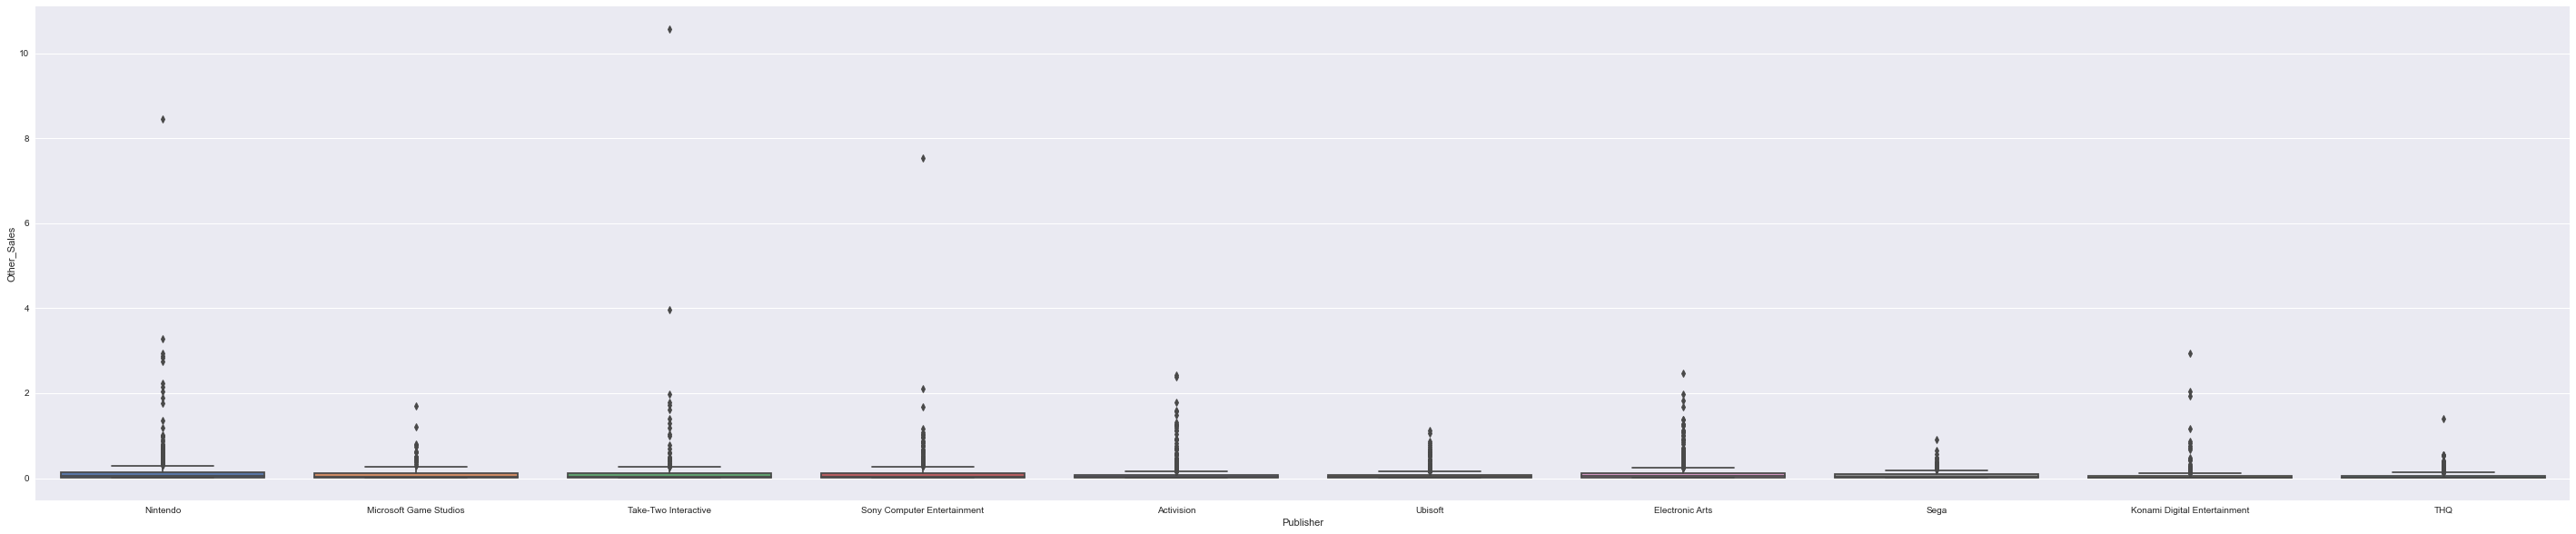

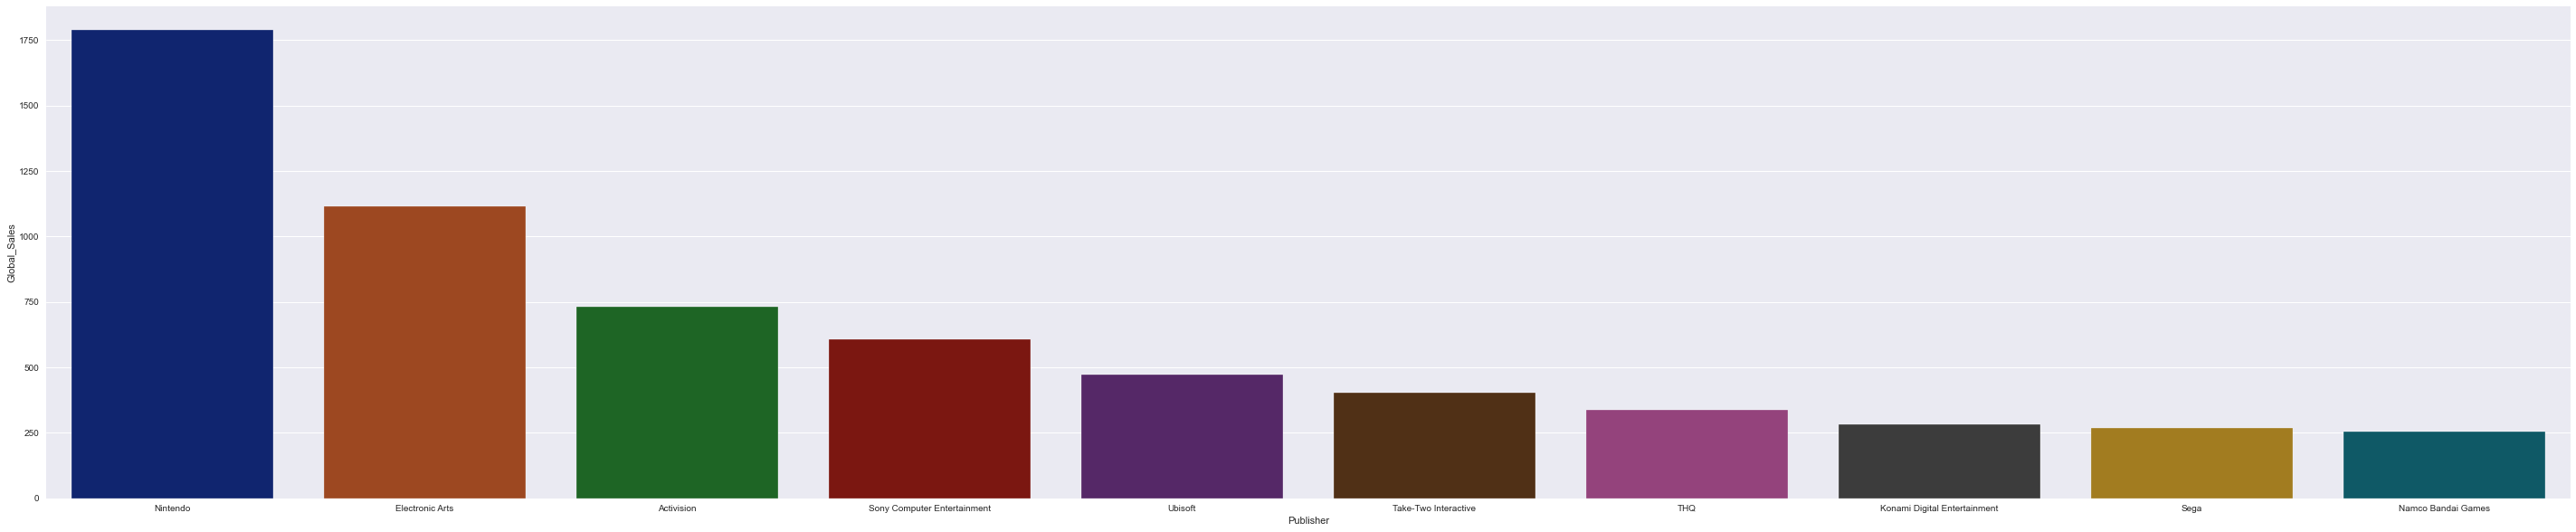

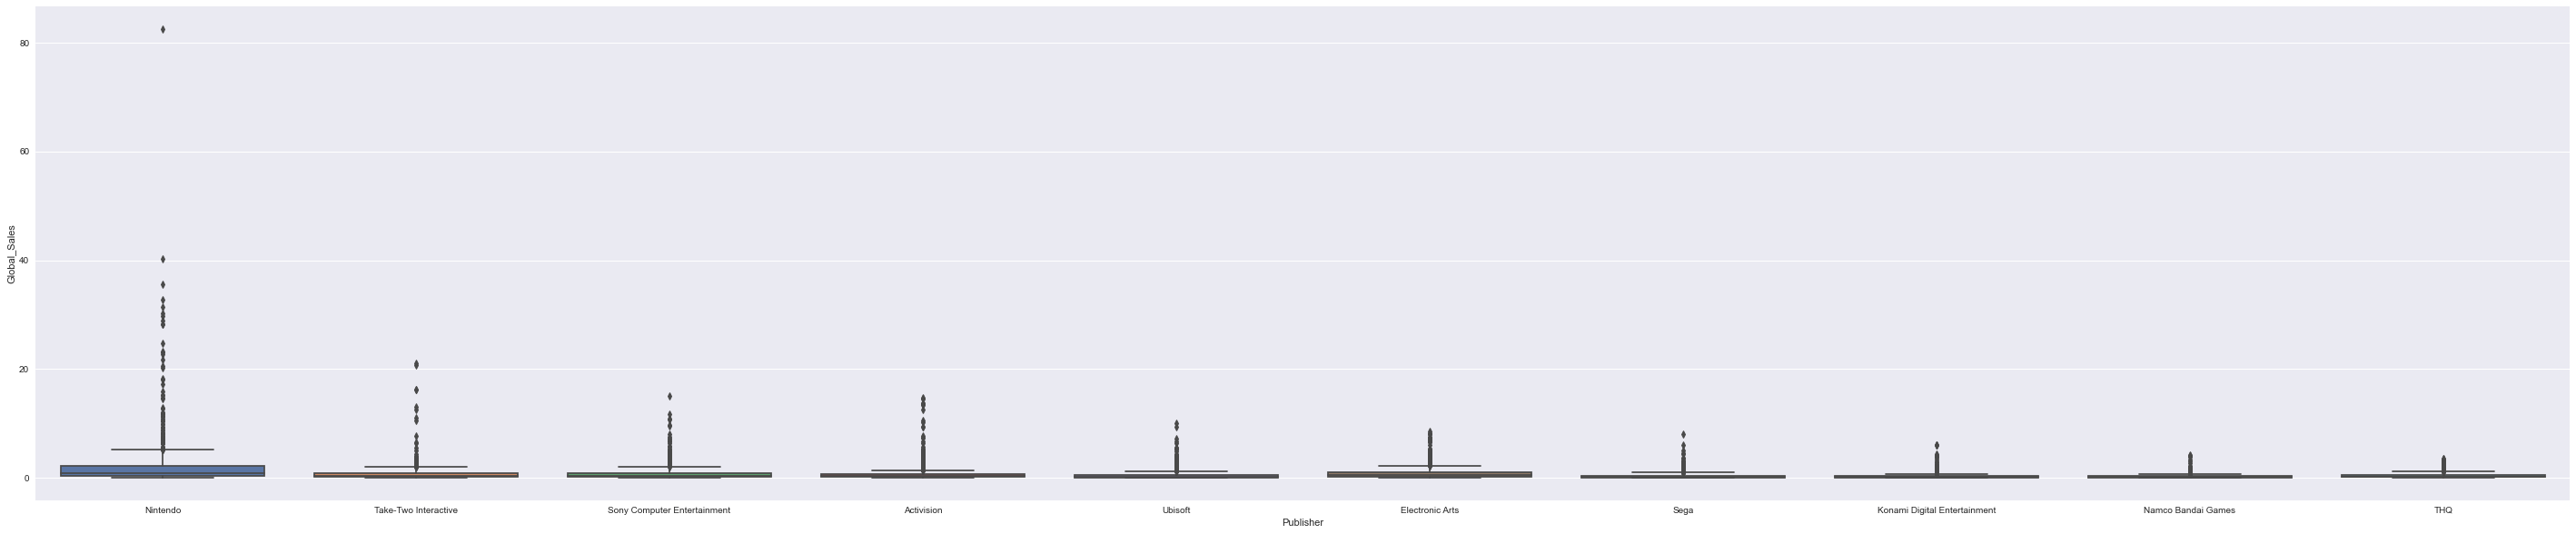

In [13]:
#NA sales
plot_most_popular(cleaned_data,"NA_Sales", "Publisher")
#EU Sales
plot_most_popular(cleaned_data,"EU_Sales", "Publisher")
#JP Sales
plot_most_popular(cleaned_data,"JP_Sales", "Publisher")
#Other Sales
plot_most_popular(cleaned_data,"Other_Sales", "Publisher")
#Global Sales
plot_most_popular(cleaned_data,"Global_Sales", "Publisher")        

Nintendo is the clear winner here despite not having the most number of games. Only losing to EA in the Other region. Furthermore, Xbox was the one of the most popular platform in all regions except for Japan.

# **4. User Score and Critic Score**

Cleaning for User Score and Critic Score

C:\Users\wenyu\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


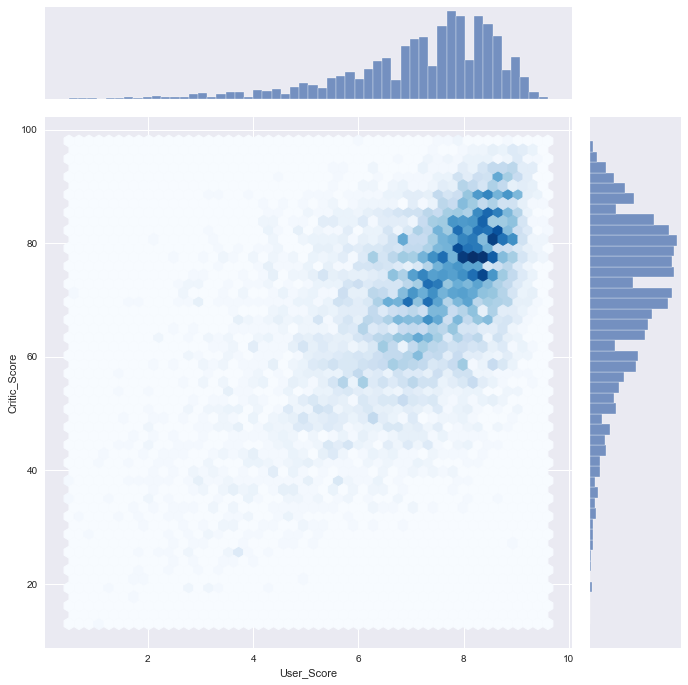

In [14]:
#testing for user_score
cleanedData = data[data["Genre"].notnull()]
cleanedData[["User_Score", "Critic_Score"]] = cleanedData[["User_Score", "Critic_Score"]].replace("tbd", np.nan).astype(float)


#correlation between user_score and critic_score, which is pretty high (high critic score = high user score)
g = sb.jointplot(x="User_Score", y="Critic_Score", data=cleanedData, cmap="Blues", kind="hex", 
                  height=10, marginal_kws={'multiple': 'stack'});

g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)

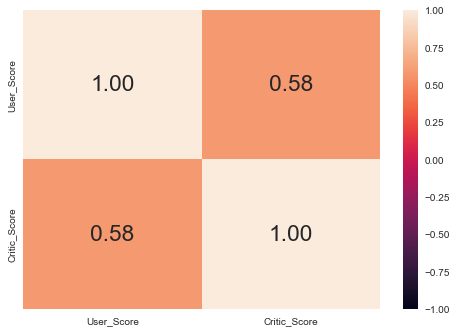

In [15]:
correlation(cleanedData, "User_Score", "Critic_Score")

correlation between user_score and critic_score, which is pretty high (generally high critic score = high user score)

Lets look at the correlation between these two variables and sales in details

For User Score:

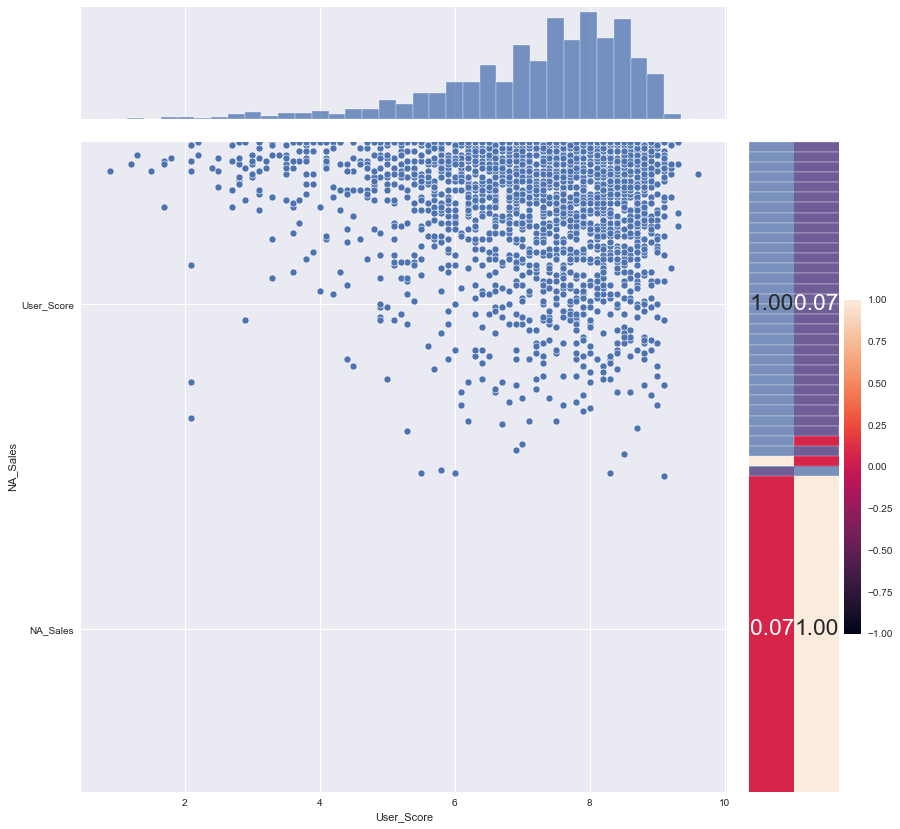

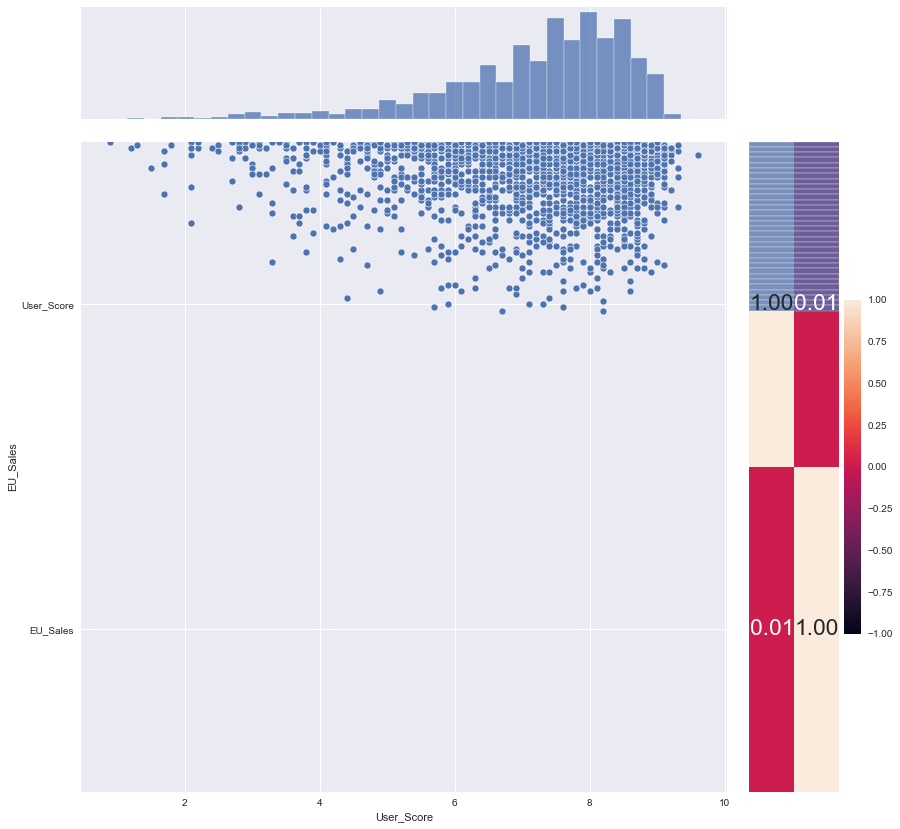

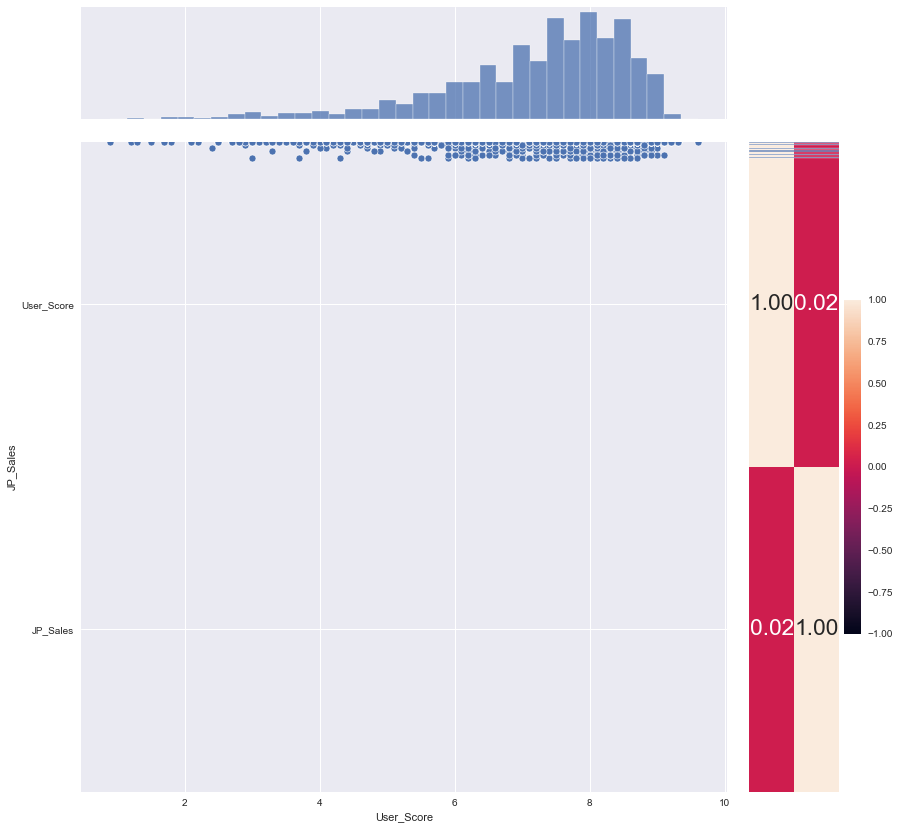

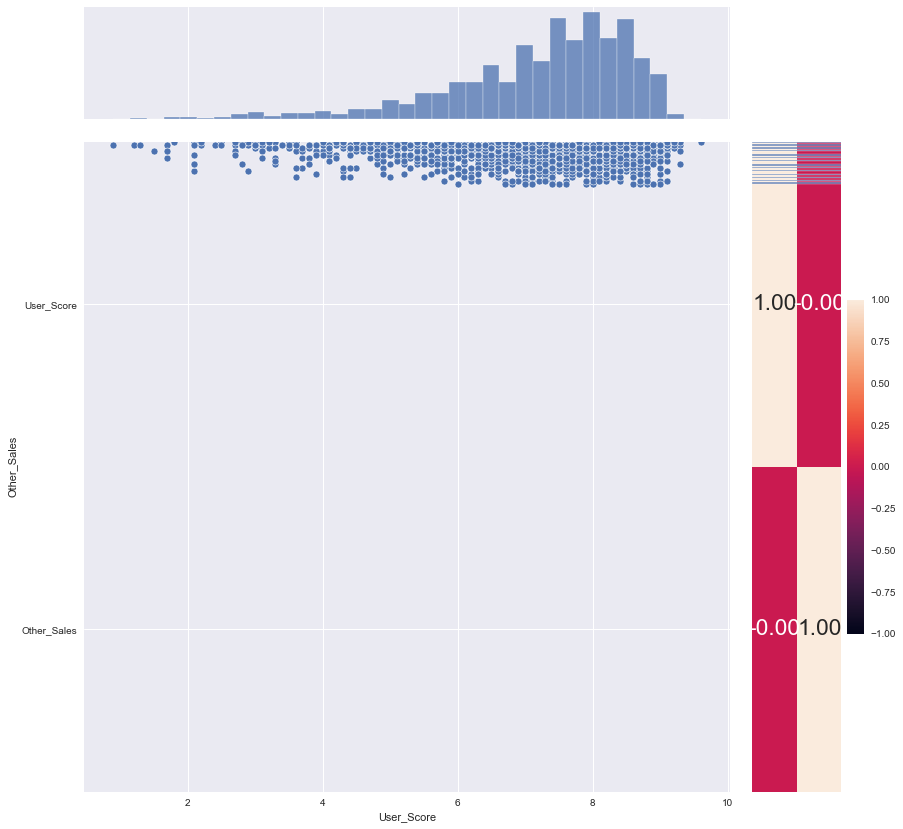

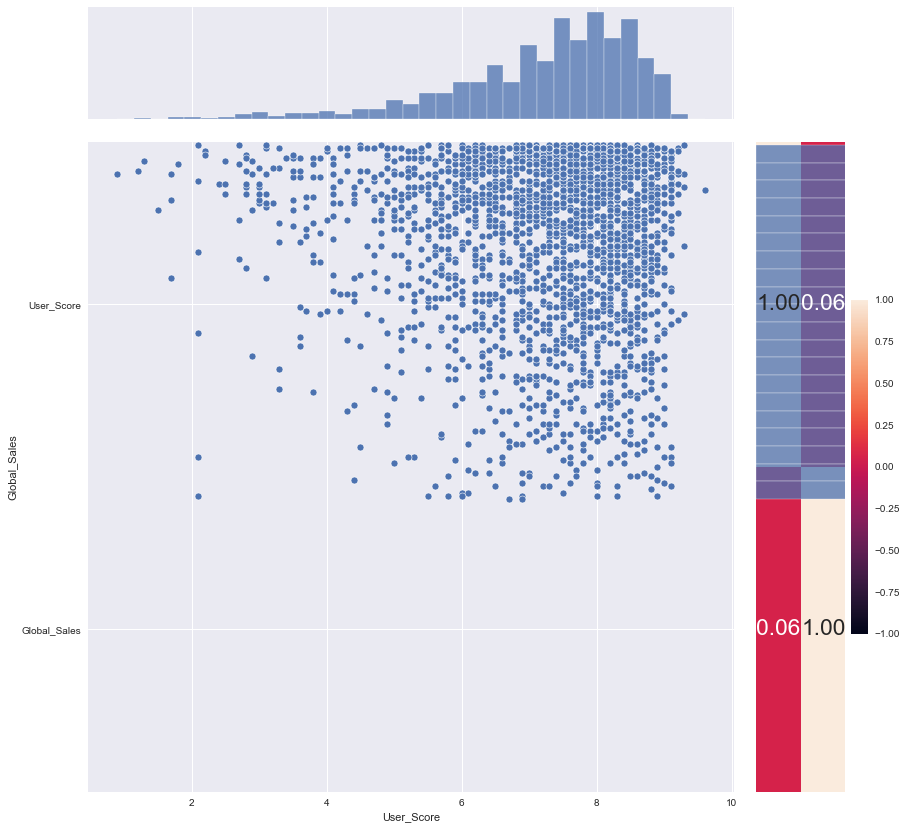

In [16]:
ratings = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count']

cleanedData = null_cleaning(cleanedData, ratings)
cleanedData = value_cleaning(cleanedData, ['Critic_Count', 'User_Count'], 10)
cleanedData = outlier_cleaning(cleanedData, ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])

userscore_region(cleanedData, "NA_Sales")
correlation(cleanedData, "User_Score", "NA_Sales")

userscore_region(cleanedData, "EU_Sales")
correlation(cleanedData, "User_Score", "EU_Sales")

userscore_region(cleanedData, "JP_Sales")
correlation(cleanedData, "User_Score", "JP_Sales")

userscore_region(cleanedData, "Other_Sales")
correlation(cleanedData, "User_Score", "Other_Sales")

userscore_region(cleanedData, "Global_Sales")
correlation(cleanedData, "User_Score", "Global_Sales")

There is hardly any relation between sales and user score. 

For Critic Score:

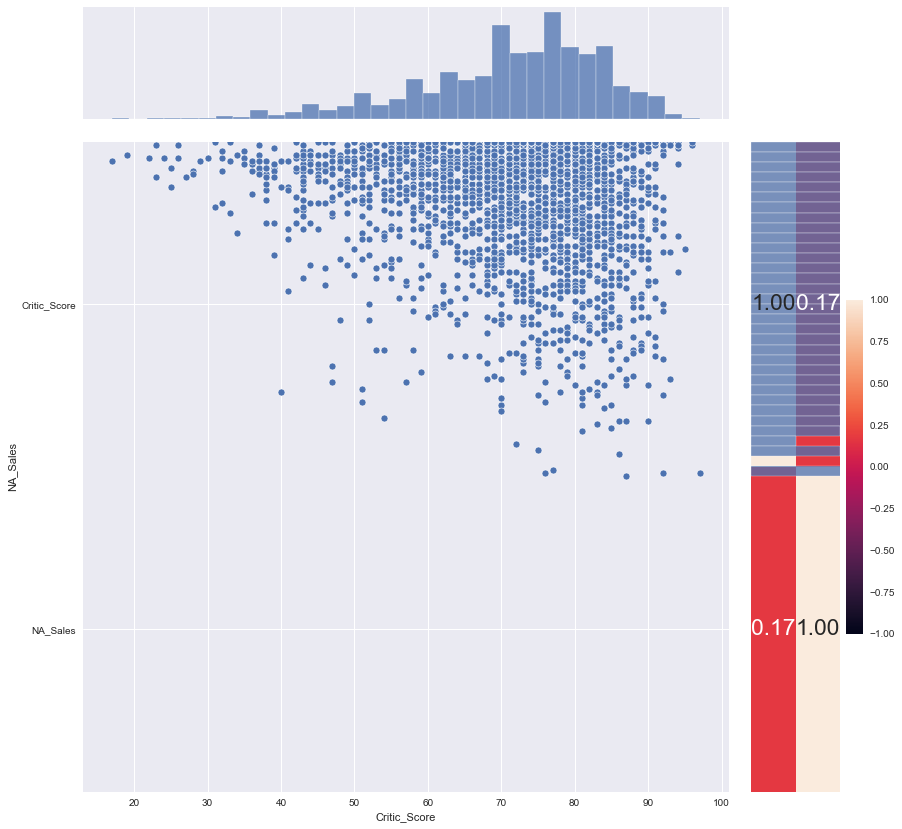

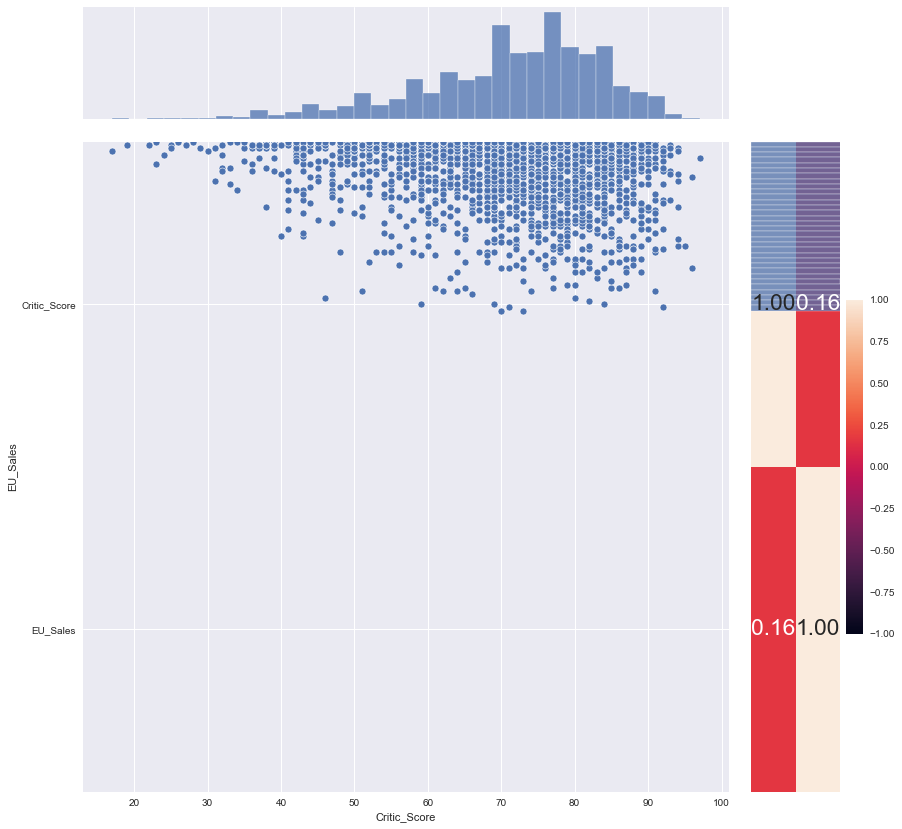

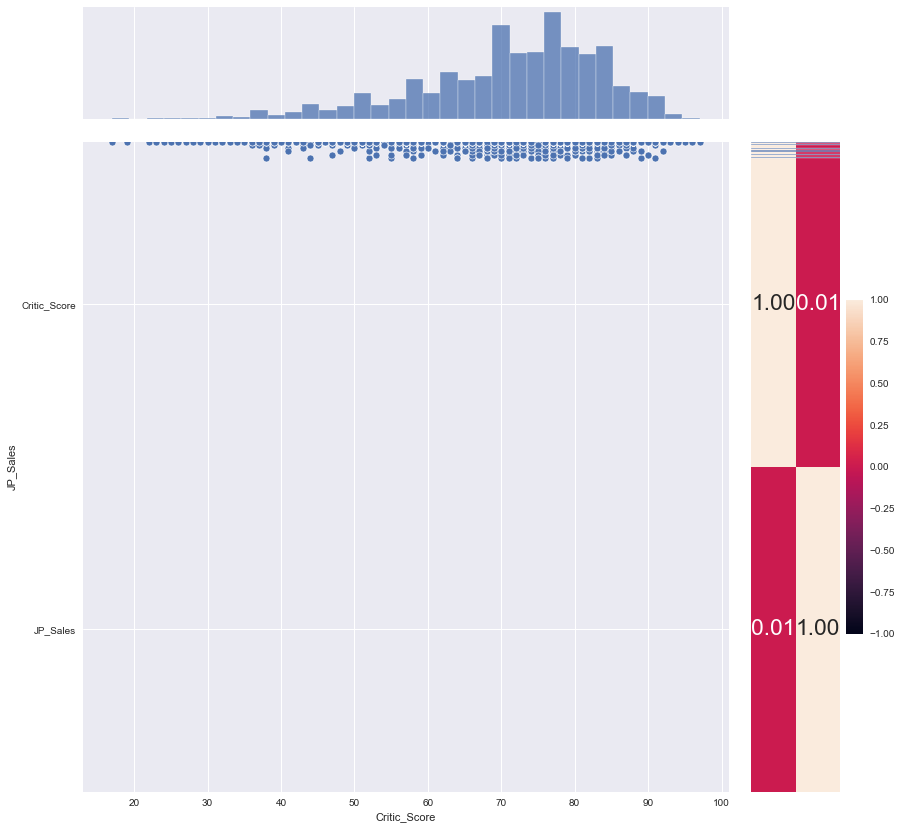

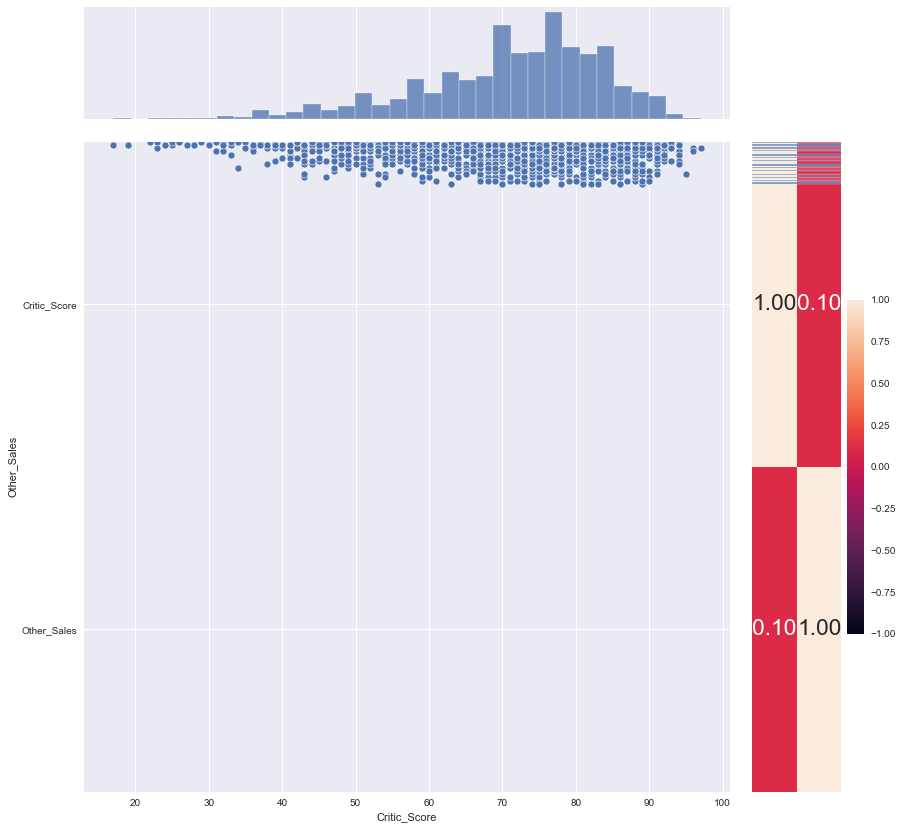

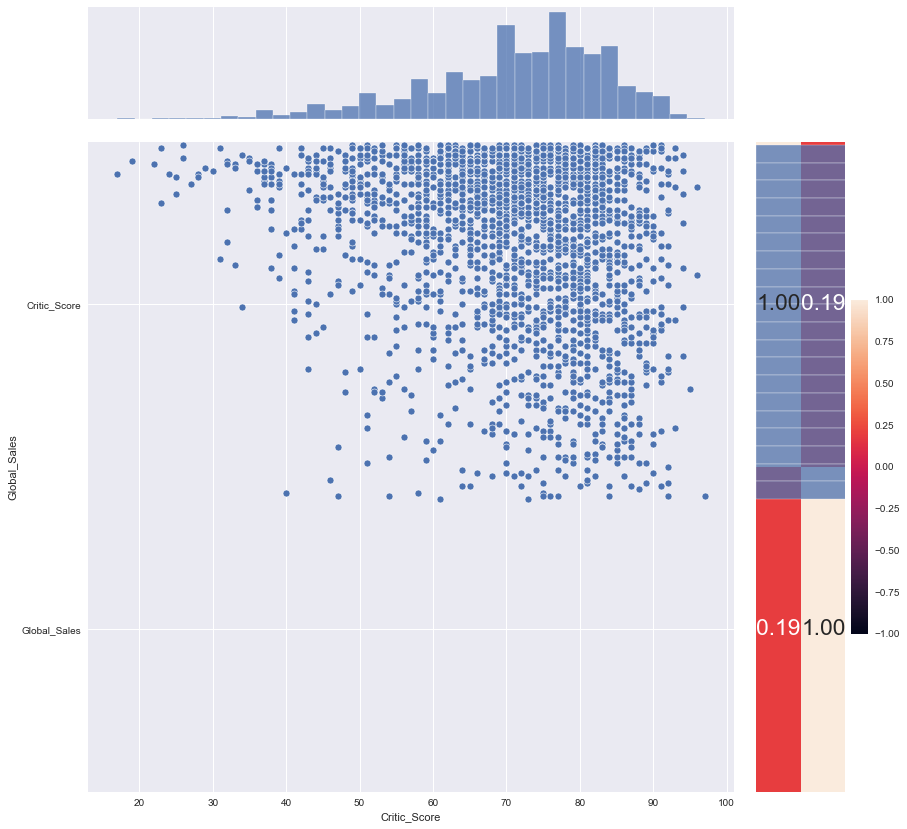

In [17]:
cscore_region(cleanedData, "NA_Sales")
correlation(cleanedData,"Critic_Score", "NA_Sales")

cscore_region(cleanedData, "EU_Sales")
correlation(cleanedData, "Critic_Score", "EU_Sales")

cscore_region(cleanedData, "JP_Sales")
correlation(cleanedData, "Critic_Score", "JP_Sales")

cscore_region(cleanedData, "Other_Sales")
correlation(cleanedData, "Critic_Score", "Other_Sales")

cscore_region(cleanedData, "Global_Sales")
correlation(cleanedData, "Critic_Score", "Global_Sales")

Although Critic Score has a better correlation, it is still super weak..